<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220810_Social_Media_Follower_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/08/09/social-media-followers-prediction-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [2]:
pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 486 kB 30.7 MB/s 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autots import AutoTS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/stats.csv')

In [5]:
data.head()

,period_start,period_end,followers_gained,followers_lost,followers_net,followers_total,subscribers_gained,subscribers_lost,subscribers_net,subscribers_total,views
0,5/1/2020,5/31/2020,1,0,1,1,0,0,0,0,128.0
1,6/1/2020,6/30/2020,8,0,8,9,0,0,0,0,16130.0
2,7/1/2020,7/31/2020,103,0,103,112,0,0,0,0,14616.0
3,8/1/2020,8/31/2020,46,0,46,158,0,0,0,0,4053.0
4,9/1/2020,9/30/2020,35,1,34,192,0,0,0,0,5153.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period_start        16 non-null     object 
 1   period_end          16 non-null     object 
 2   followers_gained    16 non-null     int64  
 3   followers_lost      16 non-null     int64  
 4   followers_net       16 non-null     int64  
 5   followers_total     16 non-null     int64  
 6   subscribers_gained  16 non-null     int64  
 7   subscribers_lost    16 non-null     int64  
 8   subscribers_net     16 non-null     int64  
 9   subscribers_total   16 non-null     int64  
 10  views               15 non-null     float64
dtypes: float64(1), int64(8), object(2)
memory usage: 1.5+ KB


In [7]:
data.tail()

,period_start,period_end,followers_gained,followers_lost,followers_net,followers_total,subscribers_gained,subscribers_lost,subscribers_net,subscribers_total,views
11,4/1/2021,4/30/2021,454,2,452,2807,8,0,8,45,134765.0
12,5/1/2021,5/31/2021,462,7,455,3262,6,0,6,51,167608.0
13,6/1/2021,6/30/2021,595,3,592,3854,5,0,5,56,154235.0
14,7/1/2021,7/31/2021,541,5,536,4390,20,6,14,70,144167.0
15,8/1/2021,8/31/2021,57,0,57,4447,6,2,4,74,NaN


In [16]:
data.views.fillna(method='ffill').tail()

11    134765.0
12    167608.0
13    154235.0
14    144167.0
15    144167.0
Name: views, dtype: float64

In [17]:
data.views.fillna(method='ffill', inplace=True)
data.tail()

,period_start,period_end,followers_gained,followers_lost,followers_net,followers_total,subscribers_gained,subscribers_lost,subscribers_net,subscribers_total,views
11,4/1/2021,4/30/2021,454,2,452,2807,8,0,8,45,134765.0
12,5/1/2021,5/31/2021,462,7,455,3262,6,0,6,51,167608.0
13,6/1/2021,6/30/2021,595,3,592,3854,5,0,5,56,154235.0
14,7/1/2021,7/31/2021,541,5,536,4390,20,6,14,70,144167.0
15,8/1/2021,8/31/2021,57,0,57,4447,6,2,4,74,144167.0


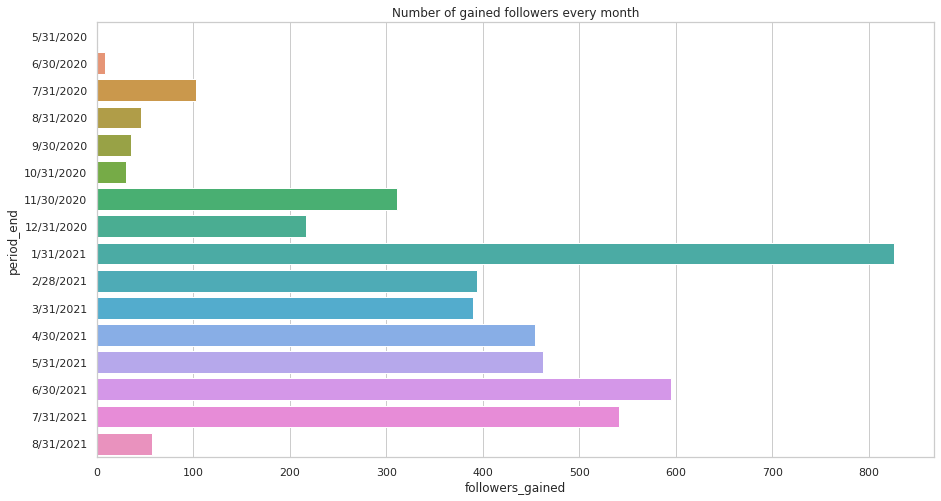

In [20]:
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid')
sns.barplot(x='followers_gained', y='period_end', data=data)
plt.title('Number of gained followers every month')
plt.show()

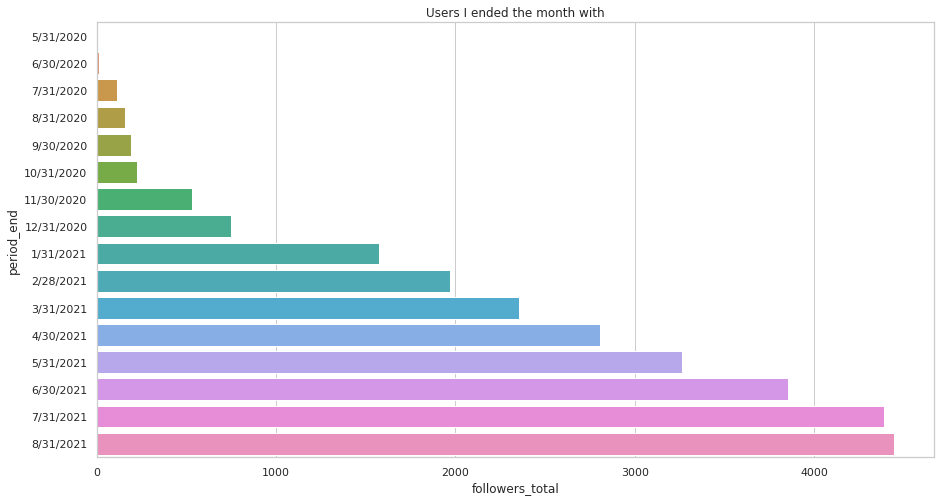

In [23]:
plt.figure(figsize=(15,8))
plt.title('Users I ended the month with')
sns.set_theme(style='darkgrid')
sns.barplot(data=data, y='period_end', x='followers_total')
plt.show()

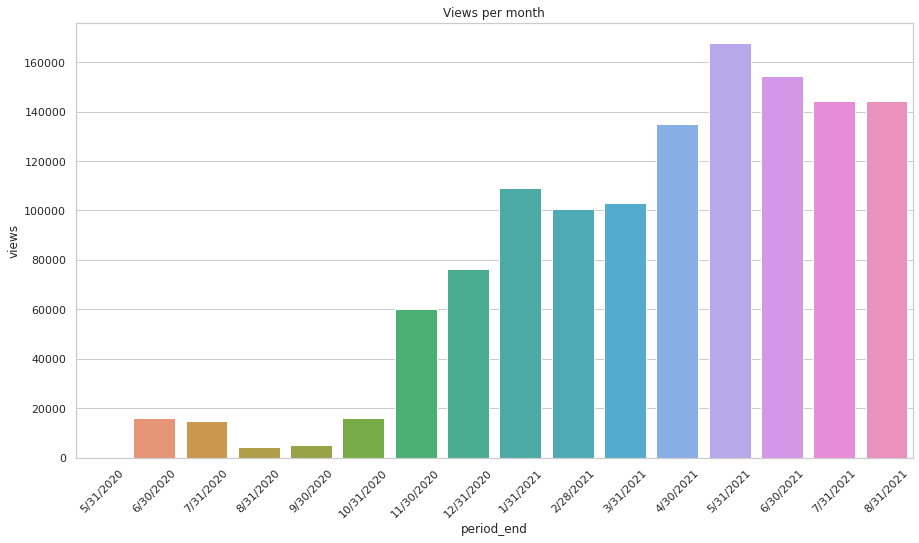

In [28]:
plt.figure(figsize=(15,8))
plt.title('Views per month')
sns.set_theme(style='whitegrid')
sns.barplot(data=data, x='period_end', y='views')
plt.xticks(rotation=45)
plt.show()

In [32]:
model = AutoTS(forecast_length=3, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='period_end', value_col='followers_gained', id_col=None)

Inferred frequency is: M
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
1/1 [==============================] - 9s 9s/step - loss: 0.3442
Epoch 2/50
1/1 [==============================] - 0s 20ms/step - loss: 0.3330
Epoch 3/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3374
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3426
Epoch 5/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3431
Epoch 6/50
1/1 [==============================] - 0s 14ms/step - loss: 0.3317
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3345
Epoch 8/50
1/1 [==============================] - 0s 16ms/step - loss: 0.3328
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 0.3357
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 0.3307
Epoch 11/50
1/1 [==============================] - 0s 12ms/step - loss: 0.3302
Epoch 12/50
1/1 [==============================] - 0s 23ms/step - loss: 0.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 35 with model FBProphet in generation 0 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 4.


Model Number: 36 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 36: GluonTS
Model Number: 37 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 38 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 38: MultivariateRegression
Model Number: 39 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 39: DatepartRegression
Model Number: 40 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 41 with model DatepartRegression in generation 0 of 10
Model Number: 42 with model UnobservedComponents in generation 0 of 10
Template Eval Error: LinAlgError('Non-positive-definite forecast error covariance matrix encountered at period 0') in model 42: UnobservedComponents
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).') in model 43: UnobservedComponents
Model Number: 44 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('could not broadcast input array from shape (19,) into shape (34,)')
Model Number: 45 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 45: VECM
Model Number: 46 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("ca

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/27dbu8or.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/6dwucvms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57146', 'data', 'file=/tmp/tmpe511029f/27dbu8or.json', 'init=/tmp/tmpe511029f/6dwucvms.json', 'output', 'file=/tmp/tmp56e2s_qj/prophet_model-20220810143938.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 55 with model SeasonalNaive in generation 0 of 10
Model Number: 56 with model DatepartRegression in generation 0 of 10
Model Number: 57 with model NVAR in generation 0 of 10
Model Number: 58 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 58: Theta
Model Number: 59 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 59: UnivariateRegression
Model Number: 60 with model ConstantNaive in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 61 with model LastValueNaive in generation 0 of 10
Model Number: 62 with model AverageValueNaive in generation 0 of 10
Model Number: 63 with model GLS in generation 0 of 10
Model Number: 64 with model SeasonalNaive in generation 0 of 10
Model Number: 65 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 65: GLM
Model Number: 66 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Number: 67 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/cn5dj6pg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/kze9xtr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35829', 'data', 'file=/tmp/tmpe511029f/cn5dj6pg.json', 'init=/tmp/tmpe511029f/kze9xtr2.json', 'output', 'file=/tmp/tmpmar356xd/prophet_model-20220810143941.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:39:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done

Model Number: 68 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 68: GluonTS
Model Number: 69 with model UnobservedComponents in generation 0 of 10
Model Number: 70 with model VAR in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 70: VAR
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 71: VECM
Model Number: 72 with model WindowRegression in generation 0 of 10
Template Eval Error: LightGBMError('[tweedie]: sum of labels is zero') in model 72: WindowRegression
Model Number: 73 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 73: DatepartRegression
Model Number: 74 with model UnivariateRegression in generation 0 of 10
Template Eval Error: Val

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Model Number: 113 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/gy5tsely.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/2yjakbwz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9084', 'data', 'file=/tmp/tmpe511029f/gy5tsely.json', 'init=/tmp/tmpe511029f/2yjakbwz.json', 'output', 'file=/tmp/tmp7dt10ihg/prophet_model-20220810143943.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 114 with model ConstantNaive in generation 0 of 10
Model Number: 115 with model DatepartRegression in generation 0 of 10
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 665117.8750
Epoch 2/50
1/1 [==============================] - 0s 14ms/step - loss: 13751554.0000
Epoch 3/50
1/1 [==============================] - 0s 16ms/step - loss: 206954.9375
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 4618356.5000
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 1091425.8750
Epoch 6/50
1/1 [==============================] - 0s 18ms/step - loss: 214018.2500
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 8720393.0000
Epoch 8/50
1/1 [==============================] - 0s 14ms/step - loss: 1022070.0625
Epoch 9/50
1/1 [==============================] - 0s 16ms/step - loss: 1076436.0000
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 1157842.8750
Epoch 11/50
1/1 [===========

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


Model Number: 116 with model FBProphet in generation 0 of 10
Model Number: 117 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 118 with model ConstantNaive in generation 0 of 10
Model Number: 119 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 119: UnivariateMotif
Model Number: 120 with model ConstantNaive in generation 0 of 10
Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model SeasonalNaive in generation 0 of 10
Model Number: 123 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 123: VAR
Model Number: 124 with model GLS in generation 0 of 10
Model Number: 125 with model WindowRegression in generation 0 of 10
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: nan
Epoch 2/50
1/1 [=====

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 135 with model NVAR in generation 0 of 10
Model Number: 136 with model SectionalMotif in generation 0 of 10
Model Number: 137 with model NVAR in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 138 with model SeasonalNaive in generation 0 of 10
Model Number: 139 with model LastValueNaive in generation 0 of 10
Model Number: 140 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (1)') in model 140: MultivariateMotif
Model Number: 141 with model ConstantNaive in generation 0 of 10
Model Number: 142 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 143 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 143: ARDL
Model Number: 144 with model DatepartRegression in generation 0 of 10
Model Number: 145 with model NVAR in generation 0 of 10
Model Number: 146 with model VAR in generation 0 of 10
Template Eval E

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/q6cu7ou1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/a0n322oy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22189', 'data', 'file=/tmp/tmpe511029f/q6cu7ou1.json', 'init=/tmp/tmpe511029f/a0n322oy.json', 'output', 'file=/tmp/tmp2sstqdat/prophet_model-20220810144006.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 155 with model GluonTS in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 155: GluonTS
Model Number: 156 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 156: VAR
Model Number: 157 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 157: MultivariateMotif
Model Number: 158 with model GLS in generation 0 of 10
Model Number: 159 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 159: GLM
Model Number: 160 with model LastValueNaive in generation 0 of 10
Model Number: 161 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 161: MultivariateMotif
Model Number: 162 with model VAR i

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 167: ARDL
Model Number: 168 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 168: SectionalMotif
Model Number: 169 with model AverageValueNaive in generation 0 of 10
New Generation: 1 of 10
Model Number: 170 with model LastValueNaive in generation 1 of 10
Model Number: 171 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 171: LastValueNaive
Model Number: 172 with model LastValueNaive in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Template Eval Error: Exception('Transformer BTCD failed on fit') in model 172: LastValueNaive
Model Number: 173 with model LastValueNaive in generation 1 of 10
Model Number: 174 with model LastValueNaive in generation 1 of 10
Model Number: 175 with model LastValueNaive in generation 1 of 10
Model Number: 176 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 177 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 178 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 179 with model GLS in generation 1 of 10
Model Number: 180 with model GLS in generation 1 of 10
Model Number: 181 with model GLS in generation 1 of 10
Model Number: 182 with model LastValueNaive in generation 1 of 10
Model Number: 183 with model LastValueNaive in generation 1 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

Model Number: 189 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 190 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on 0 with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 191 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 192 with model NVAR in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_div

Model Number: 193 with model NVAR in generation 1 of 10
Model Number: 194 with model NVAR in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 195 with model FBProphet in generation 1 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/6l1eb2gm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/3ugfx19r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61092', 'data', 'file=/tmp/tmpe511029f/6l1eb2gm.json', 'init=/tmp/tmpe511029f/3ugfx19r.json', 'output', 'file=/tmp/tmp_2geb3kk/prophet_model-20220810144009.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to o

Model Number: 196 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 196: FBProphet
Model Number: 197 with model FBProphet in generation 1 of 10
Model Number: 198 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 198: DatepartRegression
Model Number: 199 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 199: DatepartRegression
Model Number: 200 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 200: DatepartRegression
Model Number: 201 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 201: DatepartRegressi

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


Model Number: 228 with model FBProphet in generation 1 of 10
Model Number: 229 with model GLS in generation 1 of 10
Model Number: 230 with model GLS in generation 1 of 10
Model Number: 231 with model AverageValueNaive in generation 1 of 10
Model Number: 232 with model AverageValueNaive in generation 1 of 10
Model Number: 233 with model GLM in generation 1 of 10
Model Number: 234 with model GLM in generation 1 of 10
Model Number: 235 with model SeasonalNaive in generation 1 of 10
Model Number: 236 with model SeasonalNaive in generation 1 of 10
Model Number: 237 with model NVAR in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 238 with model NVAR in generation 1 of 10
Model Number: 239 with model GLS in generation 1 of 10
Model Number: 240 with model GLS in generation 1 of 10
Model Number: 241 with model GLS in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 242 with model GLS in generation 1 of 10
Model Number: 243 with model SeasonalNaive in generation 1 of 10
Model Number: 244 with model SeasonalNaive in generation 1 of 10
Model Number: 245 with model NVAR in generation 1 of 10
Model Number: 246 with model NVAR in generation 1 of 10
Model Number: 247 with model NVAR in generation 1 of 10
Model Number: 248 with model NVAR in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

Model Number: 249 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).') in model 249: UnobservedComponents
Model Number: 250 with model UnobservedComponents in generation 1 of 10
Model Number: 251 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/nn2ni67t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/y0vhj9un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21604', 'data', 'file=/tmp/tmpe511029f/nn2ni67t.json', 'init=/tmp/tmpe511029f/y0vhj9un.json', 'output', 'file=/tmp/tmp72bv71lo/prophet_model-20220810144021.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:21 - cmdstanpy - INFO - Chain [1] done processing
I

Model Number: 252 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


Model Number: 253 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/pp3wu1_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/5arqjrhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60976', 'data', 'file=/tmp/tmpe511029f/pp3wu1_1.json', 'init=/tmp/tmpe511029f/5arqjrhj.json', 'output', 'file=/tmp/tmp14dw0n_m/prophet_model-20220810144025.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 254 with model FBProphet in generation 1 of 10
Model Number: 255 with model UnobservedComponents in generation 1 of 10
Model Number: 256 with model UnobservedComponents in generation 1 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/22rb9ax6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/bo7s5hqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92900', 'data', 'file=/tmp/tmpe511029f/22rb9ax6.json', 'init=/tmp/tmpe511029f/bo7s5hqu.json', 'output', 'file=/tmp/tmp5j15fmuo/prophet_model-20220810144027.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 257 with model FBProphet in generation 1 of 10


14:40:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/ssww8vmw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/06bs2sl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52590', 'data', 'file=/tmp/tmpe511029f/ssww8vmw.json', 'init=/tmp/tmpe511029f/06bs2sl4.json', 'output', 'file=/tmp/tmpkr73mdh8/prophet_model-20220810144028.csv', 'method=optimize', 'algorithm=newton',

Model Number: 258 with model FBProphet in generation 1 of 10
Model Number: 259 with model ConstantNaive in generation 1 of 10
Model Number: 260 with model DatepartRegression in generation 1 of 10
Model Number: 261 with model DatepartRegression in generation 1 of 10
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12354427110016679936.0000
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12354427110016679936.0000
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12354427110016679936.0000
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12354427110016679936.0000
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 12354427110016679936.0000
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 12354427110016679936.0000
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12354427110016679936.0000
Epoch 8/100
1/1 [==============================] - 0s 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 269 with model SeasonalNaive in generation 1 of 10
Model Number: 270 with model ConstantNaive in generation 1 of 10
Model Number: 271 with model ConstantNaive in generation 1 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 272 with model AverageValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 272: AverageValueNaive
Model Number: 273 with model ConstantNaive in generation 1 of 10
Model Number: 274 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 274: MultivariateRegression
Model Number: 275 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 275: SectionalMotif
Model Number: 276 with model WindowRegression in generation 1 of 10
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: nan
Epoch 2/50
1/1 [==============================] - 0s 14ms/step - loss: nan
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: nan
Epoch 4/50
1/1 [==============================] - 0s 12ms/step 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 280 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 280: GLM
Model Number: 281 with model ConstantNaive in generation 2 of 10
Model Number: 282 with model GLS in generation 2 of 10
Model Number: 283 with model DatepartRegression in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 119606335158353920.0000 - val_loss: 35962454806626304.0000
Epoch 2/50
1/1 [==============================] - 0s 62ms/step - loss: 72083587180003328.0000 - val_loss: 9581974326870016.0000
Epoch 3/50
1/1 [==============================] - 0s 51ms/step - loss: 100686901140258816.0000 - val_loss: 13157294082621440.0000
Epoch 4/50
1/1 [==============================] - 0s 66ms/step - loss: 62954956314902528.0000 - val_loss: 14845308571746304.0000
Epoch 5/50
1/1 [==============================] - 0s 55ms/step - loss: 74310519133044736.0000 - val_loss: 12656472978620416.0000
Epoch 6/50
1/1 [==============================] - 0s 54ms/step - loss: 79020586428268544.0000 - val_loss: 11541785083904000.0000
Epoch 7/50
1/1 [==============================] - 0s 58ms/step - loss: 82345878957850624.0000 - val_loss: 11964805002821632.0000
Epoch 8/50
1/1 [==============================] - 0s 52ms/step - loss: 91007238855983104.0000 - va

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number o

Model Number: 290 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 291 with model DatepartRegression in generation 2 of 10
Model Number: 292 with model WindowRegression in generation 2 of 10
Model Number: 293 with model ConstantNaive in generation 2 of 10
Model Number: 294 with model WindowRegression in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.414e+01, tolerance: 2.196e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Model Number: 295 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/gaglhpr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/s6qtbsjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71203', 'data', 'file=/tmp/tmpe511029f/gaglhpr1.json', 'init=/tmp/tmpe511029f/s6qtbsjv.json', 'output', 'file=/tmp/tmpf5pud7rv/prophet_model-20220810144054.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 296 with model AverageValueNaive in generation 2 of 10
Model Number: 297 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/h8i2fkni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/ivgt4t7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31209', 'data', 'file=/tmp/tmpe511029f/h8i2fkni.json', 'init=/tmp/tmpe511029f/ivgt4t7y.json', 'output', 'file=/tmp/tmpqlk__pk_/prophet_model-20220810144056.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 298 with model FBProphet in generation 2 of 10


14:40:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 299 with model DatepartRegression in generation 2 of 10
Model Number: 300 with model LastValueNaive in generation 2 of 10
Model Number: 301 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('operands could not be broadcast together with shapes (6,) (7,) ')


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 302 with model AverageValueNaive in generation 2 of 10
Model Number: 303 with model GLS in generation 2 of 10
Model Number: 304 with model ConstantNaive in generation 2 of 10
Model Number: 305 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 306 with model LastValueNaive in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 307 with model FBProphet in generation 2 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/2x78vwon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/pb3jl84b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4719', 'data', 'file=/tmp/tmpe511029f/2x78vwon.json', 'init=/tmp/tmpe511029f/pb3jl84b.json', 'output', 'file=/tmp/tmpw3dqg1_y/prophet_model-20220810144058.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 308 with model LastValueNaive in generation 2 of 10
Model Number: 309 with model WindowRegression in generation 2 of 10
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 99.7980
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 98.6431
Epoch 3/50
1/1 [==============================] - 0s 14ms/step - loss: 97.5846
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 96.4975
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 95.6931
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 94.6235
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 93.2925
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 91.8479
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 90.3931
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 89.4748
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 88.0404
Epoch

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/wbzbu9jl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/zkf44rqd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5427', 'data', 'file=/tmp/tmpe511029f/wbzbu9jl.json', 'init=/tmp/tmpe511029f/zkf44rqd.json', 'output', 'file=/tmp/tmpj3mr_xqf/prophet_model-20220810144108.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:41:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] s

Model Number: 310 with model FBProphet in generation 2 of 10
Model Number: 311 with model LastValueNaive in generation 2 of 10
Model Number: 312 with model GLS in generation 2 of 10
Model Number: 313 with model UnobservedComponents in generation 2 of 10
Model Number: 314 with model GLS in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 315 with model LastValueNaive in generation 2 of 10
Model Number: 316 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/invoex94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/2ssn6_c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95367', 'data', 'file=/tmp/tmpe511029f/invoex94.json', 'init=/tmp/tmpe511029f/2ssn6_c6.json', 'output', 'file=/tmp/tmpn6vtxx1q/prophet_model-20220810144110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:41:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 317 with model DatepartRegression in generation 2 of 10
Model Number: 318 with model SeasonalNaive in generation 2 of 10
Model Number: 319 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 319: WindowRegression
Model Number: 320 with model DatepartRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7

Model Number: 321 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 321: GLM
Model Number: 322 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 322: SectionalMotif
Model Number: 323 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/3m_mkr3h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/o8momu0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73196', 'data', 'file=/tmp/tmpe511029f/3m_mkr3h.json', 'init=/tmp/tmpe511029f/o8momu0o.json', 'output', 'file=/tmp/tmp_3imgnix/prophet_model-20220810144114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:41:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 324 with model FBProphet in generation 2 of 10
Model Number: 325 with model NVAR in generation 2 of 10
Model Number: 326 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 326: WindowRegression
Model Number: 327 with model WindowRegression in generation 2 of 10
Model Number: 328 with model NVAR in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 329 with model FBProphet in generation 2 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/_v37kjgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/rish7245.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35912', 'data', 'file=/tmp/tmpe511029f/_v37kjgo.json', 'init=/tmp/tmpe511029f/rish7245.json', 'output', 'file=/tmp/tmp3cbx6cis/prophet_model-20220810144116.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:41:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 330 with model UnobservedComponents in generation 2 of 10
Model Number: 331 with model UnobservedComponents in generation 2 of 10
Model Number: 332 with model UnobservedComponents in generation 2 of 10
Model Number: 333 with model SeasonalNaive in generation 2 of 10
Model Number: 334 with model AverageValueNaive in generation 2 of 10
Model Number: 335 with model GLS in generation 2 of 10
Model Number: 336 with model NVAR in generation 2 of 10
Model Number: 337 with model GLM in generation 2 of 10
Model Number: 338 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError('Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 5') in model 338: WindowRegression
Model Number: 339 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 340 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError('Provided exogenous values are not o

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 348 with model WindowRegression in generation 2 of 10
Model Number: 349 with model LastValueNaive in generation 2 of 10
Model Number: 350 with model LastValueNaive in generation 2 of 10
Model Number: 351 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 352 with model ConstantNaive in generation 2 of 10
Model Number: 353 with model LastValueNaive in generation 2 of 10
Model Number: 354 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 354: MultivariateRegression
Model Number: 355 with model SeasonalNaive in generation 2 of 10
Model Number: 356 with model DatepartRegression in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 274.8750 - val_loss: 268.9058
Epoch 2/50
1/1 [==============================] - 0s 52ms/step - loss: 256.6629 - val_loss: 267.9377
Epoch 3/50
1/1 [==============================] - 0s 53ms/step - loss: 266.1642 - val_loss: 266.9637
Epoch 4/50
1/1 [==============================] - 0s 50ms/step - loss: 252.9802 - val_loss: 266.0020
Epoch 5/50
1/1 [==============================] - 0s 54ms/step - loss: 241.6890 - val_loss: 265.0319
Epoch 6/50
1/1 [==============================] - 0s 49ms/step - loss: 278.6176 - val_loss: 264.0564
Epoch 7/50
1/1 [==============================] - 0s 50ms/step - loss: 237.8062 - val_loss: 263.0923
Epoch 8/50
1/1 [==============================] - 0s 50ms/step - loss: 251.1332 - val_loss: 262.1201
Epoch 9/50
1/1 [==============================] - 0s 55ms/step - loss: 284.3054 - val_loss: 261.1421
Epoch 10/50
1/1 [==============================] - 0s 44ms/step - loss: 283.0440 - val_loss: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/fn_gvuvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/dsiav4gs.json
DEBUG:cmdst

Model Number: 364 with model AverageValueNaive in generation 2 of 10
Model Number: 365 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')
Model Number: 366 with model DatepartRegression in generation 2 of 10
Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.8148
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.8296
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.8267
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8449
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8028
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.7757
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7871
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7745
Epoch 9

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/xbt21d_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/lh2af_gb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78041', 'data', 'file=/tmp/tmpe511029f/xbt21d_y.json', 'init=/tmp/tmpe511029f/lh2af_gb.json', 'output', 'file=/tmp/tmptm7t1_t_/prophet_model-20220810144138.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 368 with model FBProphet in generation 2 of 10


14:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/ubm6965_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/8fdbb1dk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40335', 'data', 'file=/tmp/tmpe511029f/ubm6965_.json', 'init=/tmp/tmpe511029f/8fdbb1dk.json', 'output', 'file=/tmp/tmpiungar3y/prophet_model-20220810144139.csv', 'method=optimize', 'algorithm=newton',

Model Number: 369 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 369: FBProphet
Model Number: 370 with model FBProphet in generation 2 of 10
Model Number: 371 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 372 with model SeasonalNaive in generation 2 of 10
Model Number: 373 with model NVAR in generation 2 of 10
Model Number: 374 with model UnobservedComponents in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 375 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 375: NVAR
Model Number: 376 with model AverageValueNaive in generation 2 of 10
Model Number: 377 with model NVAR in generation 2 of 10
Model Number: 378 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 379 with model SeasonalNaive in generation 2 of 10
Model Number: 380 with model AverageValueNaive in generation 2 of 10
Model Number: 381 with model LastValueNaive in generation 2 of 10
Model Number: 382 with model WindowRegression in generation 2 of 10
Model Number: 383 with model WindowRegression in generation 2 of 10
Model Number: 384 with model SeasonalNaive in generation 2 of 10
Model Number: 385 with model UnobservedComponents in generation 2 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 386 with model FBProphet in generation 2 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/9lmm8ae4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/37jprv1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71242', 'data', 'file=/tmp/tmpe511029f/9lmm8ae4.json', 'init=/tmp/tmpe511029f/37jprv1f.json', 'output', 'file=/tmp/tmpajoj2bkt/prophet_model-20220810144142.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:41:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


New Generation: 3 of 10
Model Number: 387 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 388 with model DatepartRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 97016.6562
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 97008.7500
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 96984.8750
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 96972.0938
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 96942.8750
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 96907.2188
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 96886.1172
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 96854.5000
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 96827.6094
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 96805.8906
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 96785.3438
Epoch 12/100
1/1 [==============================] - 0s 14ms/step - loss: 96772.2188
Epo

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 397 with model GLM in generation 3 of 10
Model Number: 398 with model GLS in generation 3 of 10
Model Number: 399 with model LastValueNaive in generation 3 of 10
Model Number: 400 with model LastValueNaive in generation 3 of 10
Model Number: 401 with model GLM in generation 3 of 10
Model Number: 402 with model LastValueNaive in generation 3 of 10
Model Number: 403 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')
Model Number: 404 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 404: SeasonalNaive
Model Number: 405 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/jv4ttlbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/3q53ucjd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29047', 'data', 'file=/tmp/tmpe511029f/jv4ttlbt.json', 'init=/tmp/tmpe511029f/3q53ucjd.json', 'output', 'file=/tmp/tmp7nwcu3np/prophet_model-20220810144202.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:42:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 406 with model GLM in generation 3 of 10
Model Number: 407 with model LastValueNaive in generation 3 of 10
Model Number: 408 with model DatepartRegression in generation 3 of 10
Model Number: 409 with model AverageValueNaive in generation 3 of 10
Model Number: 410 with model GLS in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 411 with model LastValueNaive in generation 3 of 10
Model Number: 412 with model LastValueNaive in generation 3 of 10
Model Number: 413 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')
Model Number: 414 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/q7e4ozmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/unny9w_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22505', 'data', 'file=/tmp/tmpe511029f/q7e4ozmz.json', 'init=/tmp/tmpe511029f/unny9w_a.json', 'output', 'file=/tmp/tmpn9xaz0nl/prophet_model-20220810144204.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:42:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 415 with model SeasonalNaive in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/u6gg5xlk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/1vcpx2h6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55066', 'data', 'file=/tmp/tmpe511029f/u6gg5xlk.json', 'init=/tmp/tmpe511029f/1vcpx2h6.json', 'output', 'file=/tmp/tmpe7od46qe/prophet_model-20220810144206.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:42:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1]

Model Number: 416 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 416: WindowRegression
Model Number: 417 with model FBProphet in generation 3 of 10


14:42:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/iz12eu4d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/zn8zs26f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79778', 'data', 'file=/tmp/tmpe511029f/iz12eu4d.json', 'init=/tmp/tmpe511029f/zn8zs26f.json', 'output', 'file=/tmp/tmpax0s4vcw/prophet_model-20220810144208.csv', 'method=optimize', 'algorithm=newton'

Model Number: 418 with model FBProphet in generation 3 of 10


14:42:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 419 with model DatepartRegression in generation 3 of 10
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 99.9957
Epoch 2/50
1/1 [==============================] - 0s 14ms/step - loss: 99.9778
Epoch 3/50
1/1 [==============================] - 0s 16ms/step - loss: 99.9677
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 99.9522
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 99.9481
Epoch 6/50
1/1 [==============================] - 0s 17ms/step - loss: 99.9308
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 99.9350
Epoch 8/50
1/1 [==============================] - 0s 20ms/step - loss: 99.9108
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 99.8933
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 99.8785
Epoch 11/50
1/1 [==============================] - 0s 7ms/step - loss: 99.8724
Epoch 12/50
1/1 [==============================] - 0s 7ms/step - 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/g__y1dwm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/i_535pwe.json
DEBUG:cmdstanpy:idx 0


Model Number: 427 with model FBProphet in generation 3 of 10


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23383', 'data', 'file=/tmp/tmpe511029f/g__y1dwm.json', 'init=/tmp/tmpe511029f/i_535pwe.json', 'output', 'file=/tmp/tmpqmsfm0l5/prophet_model-20220810144218.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:42:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 428 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).') in model 428: UnobservedComponents
Model Number: 429 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')
Model Number: 430 with model DatepartRegression in generation 3 of 10
Model Number: 431 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 431: WindowRegression
Model Number: 432 with model WindowRegression in generation 3 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 432: WindowRegression
Model Number: 433 with model SeasonalNaive in generation 3 of 10
Model Number: 434 with model S

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/_fe0ps50.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/1oegy0io.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56947', 'data', 'file=/tmp/tmpe511029f/_fe0ps50.json', 'init=/tmp/tmpe511029f/1oegy0io.json', 'output', 'file=/tmp/tmp773695zw/prophet_model-20220810144229.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:42:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:29 - cmdstanpy - INFO - Chain [1] done processing
I

Model Number: 445 with model FBProphet in generation 3 of 10
Model Number: 446 with model ConstantNaive in generation 3 of 10
Model Number: 447 with model NVAR in generation 3 of 10
Model Number: 448 with model UnobservedComponents in generation 3 of 10
Model Number: 449 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 450 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 450: DatepartRegression
Model Number: 451 with model NVAR in generation 3 of 10
Model Number: 452 with model FBProphet in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/09jcb80b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/fm9h184f.json
DEBUG:cmds

Model Number: 453 with model SeasonalNaive in generation 3 of 10
Model Number: 454 with model UnobservedComponents in generation 3 of 10
Model Number: 455 with model DatepartRegression in generation 3 of 10
Model Number: 456 with model ConstantNaive in generation 3 of 10
Model Number: 457 with model GLS in generation 3 of 10
Model Number: 458 with model WindowRegression in generation 3 of 10
Model Number: 459 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 459: DatepartRegression
Model Number: 460 with model LastValueNaive in generation 3 of 10
Model Number: 461 with model ConstantNaive in generation 3 of 10
Model Number: 462 with model WindowRegression in generation 3 of 10
Epoch 1/50
Template Eval Error: ValueError('Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Model Number: 463 with model FBProphet in generation 3 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/eho9k_kx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/hlgguwu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59678', 'data', 'file=/tmp/tmpe511029f/eho9k_kx.json', 'init=/tmp/tmpe511029f/hlgguwu7.json', 'output', 'file=/tmp/tmpnpg514qv/prophet_model-20220810144235.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:42:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 464 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 465 with model UnobservedComponents in generation 3 of 10
Model Number: 466 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 466: DatepartRegression
Model Number: 467 with model AverageValueNaive in generation 3 of 10
Model Number: 468 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 469 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 469: WindowRegression
Model Number: 470 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 471 with model NVAR in generation 3 of 10
Model Number: 472 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 473 with model AverageValueNaive in generation 3 of 10
Model Number: 474 with model LastValueNaive in generation 3 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 475 with model WindowRegression in generation 3 of 10
Model Number: 476 with model ConstantNaive in generation 3 of 10
Model Number: 477 with model UnobservedComponents in generation 3 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/oh0gzq9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/38bhfebu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1730', 'data', 'file=/tmp/tmpe511029f/oh0gzq9v.json', 'init=/tmp/tmpe511029f/38bhfebu.json', 'output', 'file=/tmp/tmpe2pw5z8l/prophet_model-20220810144237.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:42:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] s

Model Number: 478 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 478: WindowRegression
Model Number: 479 with model FBProphet in generation 3 of 10


14:42:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 480 with model LastValueNaive in generation 3 of 10
Model Number: 481 with model DatepartRegression in generation 3 of 10
Model Number: 482 with model LastValueNaive in generation 3 of 10
Model Number: 483 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 483: UnobservedComponents
Model Number: 484 with model GLS in generation 3 of 10
Model Number: 485 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 485: UnobservedComponents
Model Number: 486 with model GLM in generation 3 of 10
Model Number: 487 with model FBProphet in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

Model Number: 488 with model NVAR in generation 3 of 10
Model Number: 489 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 490 with model DatepartRegression in generation 3 of 10
Model Number: 491 with model AverageValueNaive in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 492 with model DatepartRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 493 with model WindowRegression in generation 3 of 10
Model Number: 494 with model AverageValueNaive in generation 3 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 495 with model UnobservedComponents in generation 3 of 10
Model Number: 496 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 496: GLM
New Generation: 4 of 10
Model Number: 497 with model DatepartRegression in generation 4 of 10
Model Number: 498 with model AverageValueNaive in generation 4 of 10
Model Number: 499 with model LastValueNaive in generation 4 of 10
Model Number: 500 with model GLM in generation 4 of 10
Model Number: 501 with model DatepartRegression in generation 4 of 10
Model Number: 502 with model LastValueNaive in generation 4 of 10
Model Number: 503 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 503: DatepartRegression
Model Number: 504 with model SeasonalNaive in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 505 with model AverageValueNaive in generation 4 of 10
Model Number: 506 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 506: LastValueNaive
Model Number: 507 with model WindowRegression in generation 4 of 10
Model Number: 508 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 508: DatepartRegression
Model Number: 509 with model LastValueNaive in generation 4 of 10
Model Number: 510 with model UnobservedComponents in generation 4 of 10
Model Number: 511 with model WindowRegression in generation 4 of 10
Model Number: 512 with model WindowRegression in generation 4 of 10
Model Number: 513 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 513: WindowRegression
Model Number: 51

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/t1d_huxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/_7hwvo59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79904', 'data', 'file=/tmp/tmpe511029f/t1d_huxs.json', 'init=/tmp/tmpe511029f/_7hwvo59.json', 'output', 'file=/tmp/tmpnwbj9w2m/prophet_model-20220810144250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:42:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 522 with model FBProphet in generation 4 of 10
Model Number: 523 with model WindowRegression in generation 4 of 10
Model Number: 524 with model ConstantNaive in generation 4 of 10
Model Number: 525 with model DatepartRegression in generation 4 of 10
Model Number: 526 with model GLS in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 527 with model DatepartRegression in generation 4 of 10
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00
Epoch 8/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00
Epoch 11/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00
Epoch 12/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00
Epoch 13/50
1/1 [=========

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 529 with model LastValueNaive in generation 4 of 10
Model Number: 530 with model GLM in generation 4 of 10
Model Number: 531 with model GLM in generation 4 of 10
Model Number: 532 with model LastValueNaive in generation 4 of 10
Model Number: 533 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 533: DatepartRegression
Model Number: 534 with model UnobservedComponents in generation 4 of 10
Model Number: 535 with model UnobservedComponents in generation 4 of 10
Model Number: 536 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 536: ETS
Model Number: 537 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Model Number: 538 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/h8cg7dkk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/55tfxn14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98383', 'data', 'file=/tmp/tmpe511029f/h8cg7dkk.json', 'init=/tmp/tmpe511029f/55tfxn14.json', 'output', 'file=/tmp/tmp74dv7n83/prophet_model-20220810144302.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 539 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 539: AverageValueNaive
Model Number: 540 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 541 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 542 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 543 with model FBProphet in generation 4 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/m26h7fuj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/u7dft4bj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6278', 'data', 'file=/tmp/tmpe511029f/m26h7fuj.json', 'init=/tmp/tmpe511029f/u7dft4bj.json', 'output', 'file=/tmp/tmpjlm7xh6i/prophet_model-20220810144304.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 544 with model GLS in generation 4 of 10
Model Number: 545 with model LastValueNaive in generation 4 of 10
Model Number: 546 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 547 with model WindowRegression in generation 4 of 10
Model Number: 548 with model SeasonalNaive in generation 4 of 10
Model Number: 549 with model AverageValueNaive in generation 4 of 10
Model Number: 550 with model GLS in generation 4 of 10
Model Number: 551 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/3mkyh7kl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/6p_b8tl5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77389', 'data', 'file=/tmp/tmpe511029f/3mkyh7kl.json', 'init=/tmp/tmpe511029f/6p_b8tl5.json', 'output', 'file=/tmp/tmpnimwu0om/prophet_model-20220810144306.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 552 with model FBProphet in generation 4 of 10
Model Number: 553 with model WindowRegression in generation 4 of 10
Model Number: 554 with model SectionalMotif in generation 4 of 10
Model Number: 555 with model GLS in generation 4 of 10
Model Number: 556 with model SeasonalNaive in generation 4 of 10
Model Number: 557 with model NVAR in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 557: NVAR
Model Number: 558 with model LastValueNaive in generation 4 of 10
Model Number: 559 with model SeasonalNaive in generation 4 of 10
Model Number: 560 with model GLM in generation 4 of 10
Model Number: 561 with model ConstantNaive in generation 4 of 10
Model Number: 562 with model GLM in generation 4 of 10
Model Number: 563 with model LastValueNaive in generation 4 of 10
Model Number: 564 with model ETS in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 564: ETS
Model Number: 565 with model Unobse

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 566 with model FBProphet in generation 4 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/rxriqt0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/hpfahwy_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78391', 'data', 'file=/tmp/tmpe511029f/rxriqt0l.json', 'init=/tmp/tmpe511029f/hpfahwy_.json', 'output', 'file=/tmp/tmp_izlpfmw/prophet_model-20220810144310.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 567 with model UnobservedComponents in generation 4 of 10
Model Number: 568 with model AverageValueNaive in generation 4 of 10
Model Number: 569 with model UnobservedComponents in generation 4 of 10
Model Number: 570 with model SeasonalNaive in generation 4 of 10
Model Number: 571 with model LastValueNaive in generation 4 of 10
Model Number: 572 with model SeasonalNaive in generation 4 of 10
Model Number: 573 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 573: UnobservedComponents
Model Number: 574 with model NVAR in generation 4 of 10
Model Number: 575 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 575: WindowRegression
Model Number: 576 with model FBProphet in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/dczxgx5i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/ps_1lqrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

Model Number: 577 with model DatepartRegression in generation 4 of 10
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 107.4806
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 107.4698
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 107.4500
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 107.4129
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 107.3830
Epoch 6/50
1/1 [==============================] - 0s 29ms/step - loss: 107.3097
Epoch 7/50
1/1 [==============================] - 0s 35ms/step - loss: 107.2989
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 107.2957
Epoch 9/50
1/1 [==============================] - 0s 33ms/step - loss: 107.1917
Epoch 10/50
1/1 [==============================] - 0s 30ms/step - loss: 107.2020
Epoch 11/50
1/1 [==============================] - 0s 27ms/step - loss: 107.1025
Epoch 12/50
1/1 [==============================] -

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 583 with model DatepartRegression in generation 4 of 10
Model Number: 584 with model SeasonalNaive in generation 4 of 10
Model Number: 585 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 586 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 587 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 588 with model SeasonalNaive in generation 4 of 10
Model Number: 589 with model LastValueNaive in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Model Number: 590 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/mlclzhgb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/yf4lwz33.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13489', 'data', 'file=/tmp/tmpe511029f/mlclzhgb.json', 'init=/tmp/tmpe511029f/yf4lwz33.json', 'output', 'file=/tmp/tmp0pgntmhx/prophet_model-20220810144323.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 591 with model ConstantNaive in generation 4 of 10
Model Number: 592 with model SeasonalNaive in generation 4 of 10
Model Number: 593 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 593: ETS
Model Number: 594 with model GLS in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 594: GLS
Model Number: 595 with model UnobservedComponents in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


Model Number: 596 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 596: WindowRegression
Model Number: 597 with model ConstantNaive in generation 4 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'median', 'transformations': {'0': 'MaxAbsScaler', '1': 'QuantileTransformer', '2': 'Detrend', '3': 'SeasonalDifference', '4': 'PowerTransformer'}, 'transformation_params': {'0': {}, '1': {'output_distribution': 'uniform', 'n_quantiles': 4}, '2': {'model': 'Tweedie', 'phi': 1, 'window': None}, '3': {'lag_1': 37, 'method': 'Median'}, '4': {}}}. fail_on_forecast_nan=True") in model 597: ConstantNaive
Model Number: 598 with model AverageValueNaive in generation 4 of 10
Model Number: 599 with model MultivariateRegression in generation 4 of 10
Model Number: 600 with model DatepartRegression in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 601 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 601: UnobservedComponents
Model Number: 602 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 602: AverageValueNaive
Model Number: 603 with model AverageValueNaive in generation 4 of 10
Model Number: 604 with model AverageValueNaive in generation 4 of 10
Model Number: 605 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 606 with model LastValueNaive in generation 4 of 10
New Generation: 5 of 10
Model Number: 607 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 607: WindowRegression
Model Number: 608 with model LastValueNaive in generation 5 of 10
Mod

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 613 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 614 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 615 with model UnobservedComponents in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/7n0oyfr_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/uuz3gnpf.json
DEBUG:cmdst

Model Number: 616 with model FBProphet in generation 5 of 10


14:43:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 617 with model LastValueNaive in generation 5 of 10
Model Number: 618 with model GLS in generation 5 of 10
Model Number: 619 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 620 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).') in model 620: WindowRegression
Model Number: 621 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 621: WindowRegression
Model Number: 622 with model AverageValueNaive in generation 5 of 10
Model Number: 623 with model ETS in generation 5 of 10
Template Eval Error: Exception('Transformer STLFilter failed o

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 627 with model DatepartRegression in generation 5 of 10
Model Number: 628 with model WindowRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm

Model Number: 629 with model DatepartRegression in generation 5 of 10
Model Number: 630 with model UnobservedComponents in generation 5 of 10
Model Number: 631 with model LastValueNaive in generation 5 of 10
Model Number: 632 with model LastValueNaive in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_

Model Number: 633 with model WindowRegression in generation 5 of 10
Model Number: 634 with model SeasonalNaive in generation 5 of 10
Model Number: 635 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 636 with model LastValueNaive in generation 5 of 10
Model Number: 637 with model WindowRegression in generation 5 of 10
Model Number: 638 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 638: DatepartRegression
Model Number: 639 with model SeasonalNaive in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 639: SeasonalNaive
Model Number: 640 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 641 with model UnobservedComponents in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:2450: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  random,


Model Number: 642 with model WindowRegression in generation 5 of 10
Model Number: 643 with model NVAR in generation 5 of 10
Model Number: 644 with model SectionalMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=15) out of bounds (1)') in model 644: SectionalMotif
Model Number: 645 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: nan - val_loss: nan
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: nan - val_loss: nan
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: nan - val_loss: nan
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: nan - val_loss: nan
Epoch 5/50
1/1 [==============================] - 0s 36ms/step - loss: nan - val_loss: nan
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: nan - val_loss: nan
Epoch 7/50
1/1 [==============================] - 0s 40ms/step - loss: nan - val_loss: nan
Epoch 8/50
1/1 [==============================] - 0s 45ms/step - loss: nan - val_loss: nan
Epoch 9/50
1/1 [==============================] - 0s 37ms/step - loss: nan - val_loss: nan
Epoch 10/50
1/1 [==============================] - 0s 61ms/step - loss: nan - val_loss: nan
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more seri

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 651 with model LastValueNaive in generation 5 of 10
Model Number: 652 with model LastValueNaive in generation 5 of 10
Model Number: 653 with model DatepartRegression in generation 5 of 10
Model Number: 654 with model FBProphet in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. 

Model Number: 655 with model WindowRegression in generation 5 of 10
Model Number: 656 with model AverageValueNaive in generation 5 of 10
Model Number: 657 with model MultivariateRegression in generation 5 of 10
Model Number: 658 with model MultivariateRegression in generation 5 of 10
Model Number: 659 with model SeasonalNaive in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 660 with model LastValueNaive in generation 5 of 10
Model Number: 661 with model AverageValueNaive in generation 5 of 10
Model Number: 662 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 662: WindowRegression
Model Number: 663 with model SectionalMotif in generation 5 of 10
Model Number: 664 with model WindowRegression in generation 5 of 10
Model Number: 665 with model GLM in generation 5 of 10
Model Number: 666 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 666: UnobservedComponents
Model Number: 667 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)


Model Number: 668 with model GLS in generation 5 of 10
Model Number: 669 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonal

Model Number: 670 with model FBProphet in generation 5 of 10


14:43:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/3n0i63kk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/m4gvjadr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95776', 'data', 'file=/tmp/tmpe511029f/3n0i63kk.json', 'init=/tmp/tmpe511029f/m4gvjadr.json', 'output', 'file=/tmp/tmp13n8wg69/prophet_model-20220810144339.csv', 'method=optimize', 'algorithm=newton',

Model Number: 671 with model FBProphet in generation 5 of 10
Model Number: 672 with model NVAR in generation 5 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/3ltc00i8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/mkecj4j3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43983', 'data', 'file=/tmp/tmpe511029f/3ltc00i8.json', 'init=/tmp/tmpe511029f/mkecj4j3.json', 'output', 'file=/tmp/tmphnx_yc1h/prophet_model-20220810144340.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 673 with model FBProphet in generation 5 of 10
Model Number: 674 with model GLS in generation 5 of 10
Model Number: 675 with model ConstantNaive in generation 5 of 10
Model Number: 676 with model LastValueNaive in generation 5 of 10
Model Number: 677 with model SeasonalNaive in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 678 with model NVAR in generation 5 of 10
Model Number: 679 with model UnobservedComponents in generation 5 of 10
Model Number: 680 with model SeasonalNaive in generation 5 of 10
Model Number: 681 with model DatepartRegression in generation 5 of 10
Model Number: 682 with model UnobservedComponents in generation 5 of 10
Model Number: 683 with model LastValueNaive in generation 5 of 10
Model Number: 684 with model AverageValueNaive in generation 5 of 10
Model Number: 685 with model NVAR in generation 5 of 10
Model Number: 686 with model WindowRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y

Model Number: 687 with model LastValueNaive in generation 5 of 10
Model Number: 688 with model WindowRegression in generation 5 of 10
Model Number: 689 with model AverageValueNaive in generation 5 of 10
Model Number: 690 with model GLS in generation 5 of 10
Model Number: 691 with model DatepartRegression in generation 5 of 10
Model Number: 692 with model AverageValueNaive in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm

Model Number: 693 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError('`min_samples` may not be larger than number of samples: n_samples = 9.') in model 693: MultivariateRegression
Model Number: 694 with model LastValueNaive in generation 5 of 10
New Generation: 6 of 10
Model Number: 695 with model AverageValueNaive in generation 6 of 10
Model Number: 696 with model DatepartRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 697 with model SeasonalNaive in generation 6 of 10
Model Number: 698 with model LastValueNaive in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/pnrjt9k1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/a4xc8pcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdsta

Model Number: 699 with model FBProphet in generation 6 of 10


14:43:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 700 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 700: DatepartRegression
Model Number: 701 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 702 with model LastValueNaive in generation 6 of 10
Model Number: 703 with model WindowRegression in generation 6 of 10
Model Number: 704 with model LastValueNaive in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 705 with model LastValueNaive in generation 6 of 10
Model Number: 706 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on 0 with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 707 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 707: UnobservedComponents
Model Number: 708 with model GLS in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:326: RuntimeWarning: invalid value encountered in add
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323:

Model Number: 709 with model AverageValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 709: AverageValueNaive
Model Number: 710 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 710: WindowRegression
Model Number: 711 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 712 with model MultivariateRegression in generation 6 of 10
Model Number: 713 with model UnobservedComponents in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 714 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 714: WindowRegression
Model Number: 715 with model FBProphet in generation 6 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/82snmcv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/1hq6wwu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80994', 'data', 'file=/tmp/tmpe511029f/82snmcv1.json', 'init=/tmp/tmpe511029f/1hq6wwu2.json', 'output', 'file=/tmp/tmptfn12ocv/prophet_model-20220810144346.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 716 with model SeasonalNaive in generation 6 of 10
Model Number: 717 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 718 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 719 with model SeasonalNaive in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 720 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 720: MultivariateRegression
Model Number: 721 with model UnobservedComponents in generation 6 of 10
Model Number: 722 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')
Model Number: 723 with model DatepartRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

Model Number: 724 with model FBProphet in generation 6 of 10
Model Number: 725 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 726 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 727 with model ConstantNaive in generation 6 of 10
Model Number: 728 with model AverageValueNaive in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 729 with model NVAR in generation 6 of 10
Model Number: 730 with model WindowRegression in generation 6 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 730: WindowRegression
Model Number: 731 with model AverageValueNaive in generation 6 of 10
Model Number: 732 with model WindowRegression in generation 6 of 10
Model Number: 733 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:532: RuntimeWarning: divide by zero encountered in true_divide
  K = (u / d).T[:n_components]  # see (6.33) p.140
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-pack

Model Number: 734 with model WindowRegression in generation 6 of 10
Model Number: 735 with model GLS in generation 6 of 10
Model Number: 736 with model LastValueNaive in generation 6 of 10
Model Number: 737 with model SeasonalNaive in generation 6 of 10
Model Number: 738 with model GLM in generation 6 of 10
Model Number: 739 with model WindowRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly 

Model Number: 740 with model FBProphet in generation 6 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/ulwhhnmb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/d42ffa27.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33086', 'data', 'file=/tmp/tmpe511029f/ulwhhnmb.json', 'init=/tmp/tmpe511029f/d42ffa27.json', 'output', 'file=/tmp/tmpkpe32n0t/prophet_model-20220810144350.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 741 with model DatepartRegression in generation 6 of 10
Model Number: 742 with model DatepartRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 743 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 743: DatepartRegression
Model Number: 744 with model DatepartRegression in generation 6 of 10
Model Number: 745 with model UnobservedComponents in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 746 with model UnobservedComponents in generation 6 of 10
Model Number: 747 with model NVAR in generation 6 of 10
Model Number: 748 with model LastValueNaive in generation 6 of 10
Model Number: 749 with model NVAR in generation 6 of 10
Model Number: 750 with model ConstantNaive in generation 6 of 10
Model Number: 751 with model GLM in generation 6 of 10
Model Number: 752 with model WindowRegression in generation 6 of 10
Model Number: 753 with model AverageValueNaive in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 754 with model LastValueNaive in generation 6 of 10
Model Number: 755 with model GLS in generation 6 of 10
Model Number: 756 with model NVAR in generation 6 of 10
Model Number: 757 with model UnobservedComponents in generation 6 of 10
Template Eval Error: LinAlgError('Non-positive-definite forecast error covariance matrix encountered at period 1') in model 757: UnobservedComponents
Model Number: 758 with model MultivariateRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 759 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 760 with model DatepartRegression in generation 6 of 10
Model Number: 761 with model LastValueNaive in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 762 with model UnobservedComponents in generation 6 of 10
Model Number: 763 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 764 with model FBProphet in generation 6 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/qgo_4man.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/jvun6f_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70986', 'data', 'file=/tmp/tmpe511029f/qgo_4man.json', 'init=/tmp/tmpe511029f/jvun6f_2.json', 'output', 'file=/tmp/tmpyrfyutyt/prophet_model-20220810144354.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 765 with model SeasonalNaive in generation 6 of 10
Model Number: 766 with model UnobservedComponents in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/22lih7p1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/czyafv6j.json
DEBUG:cmdst

Model Number: 767 with model FBProphet in generation 6 of 10


14:43:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 768 with model SeasonalNaive in generation 6 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/s52m9r0p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/ml8ezal8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94439', 'data', 'file=/tmp/tmpe511029f/s52m9r0p.json', 'init=/tmp/tmpe511029f/ml8ezal8.json', 'output', 'file=/tmp/tmpsp81629z/prophet_model-20220810144357.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 769 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError('The number of observations (1) is too small; the covariance matrix is singular. For observations with 10 dimensions, at least 11 observations are required.') in model 769: SectionalMotif
Model Number: 770 with model FBProphet in generation 6 of 10


14:43:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 771 with model GLS in generation 6 of 10
Model Number: 772 with model LastValueNaive in generation 6 of 10
Model Number: 773 with model LastValueNaive in generation 6 of 10
Model Number: 774 with model WindowRegression in generation 6 of 10
Model Number: 775 with model SeasonalNaive in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 776 with model LastValueNaive in generation 6 of 10
Model Number: 777 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).') in model 777: UnobservedComponents
Model Number: 778 with model AverageValueNaive in generation 6 of 10
Model Number: 779 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 779: UnobservedComponents
Model Number: 780 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 781 with model LastValueNaive in generation 6 of 10
Model Number: 782 with model GLM in generation 6 of 10
New Generation: 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 783 with model DatepartRegression in generation 7 of 10
Model Number: 784 with model AverageValueNaive in generation 7 of 10
Model Number: 785 with model GLS in generation 7 of 10
Model Number: 786 with model SeasonalNaive in generation 7 of 10
Model Number: 787 with model GLM in generation 7 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 787: GLM
Model Number: 788 with model UnobservedComponents in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y

Model Number: 789 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/7b9jglp1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/egulbwyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73684', 'data', 'file=/tmp/tmpe511029f/7b9jglp1.json', 'init=/tmp/tmpe511029f/egulbwyp.json', 'output', 'file=/tmp/tmpbd59gzv2/prophet_model-20220810144400.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 790 with model NVAR in generation 7 of 10
Model Number: 791 with model NVAR in generation 7 of 10
Model Number: 792 with model WindowRegression in generation 7 of 10
Model Number: 793 with model SeasonalNaive in generation 7 of 10
Model Number: 794 with model SeasonalNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 795 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 795: WindowRegression
Model Number: 796 with model AverageValueNaive in generation 7 of 10
Model Number: 797 with model GLS in generation 7 of 10
Model Number: 798 with model DatepartRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 799 with model NVAR in generation 7 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on inverse') in model 799: NVAR


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


Model Number: 800 with model DatepartRegression in generation 7 of 10
Model Number: 801 with model MultivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 801: MultivariateRegression
Model Number: 802 with model NVAR in generation 7 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y

Model Number: 803 with model FBProphet in generation 7 of 10


14:44:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 804 with model LastValueNaive in generation 7 of 10
Model Number: 805 with model SeasonalNaive in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/sup_tg3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/qw1wuj7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16586', 'data', 'file=/tmp/tmpe511029f/sup_tg3y.json', 'init=/tmp/tmpe511029f/qw1wuj7d.json', 'output', 'file=/tmp/tmpnqt4vlmq/prophet_model-20220810144404.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

Model Number: 806 with model FBProphet in generation 7 of 10


14:44:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 807 with model LastValueNaive in generation 7 of 10
Model Number: 808 with model SeasonalNaive in generation 7 of 10
Model Number: 809 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 810 with model NVAR in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y

Model Number: 811 with model LastValueNaive in generation 7 of 10
Model Number: 812 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 813 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 813: WindowRegression
Model Number: 814 with model UnobservedComponents in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 815 with model DatepartRegression in generation 7 of 10
Model Number: 816 with model UnobservedComponents in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 817 with model UnobservedComponents in generation 7 of 10
Model Number: 818 with model GLS in generation 7 of 10
Model Number: 819 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 819: LastValueNaive
Model Number: 820 with model MultivariateRegression in generation 7 of 10
Model Number: 821 with model AverageValueNaive in generation 7 of 10
Model Number: 822 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 822: SectionalMotif
Model Number: 823 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(

Model Number: 824 with model GLS in generation 7 of 10
Model Number: 825 with model GLS in generation 7 of 10
Model Number: 826 with model DatepartRegression in generation 7 of 10
Model Number: 827 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 827: UnobservedComponents
Model Number: 828 with model WindowRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 829 with model AverageValueNaive in generation 7 of 10
Model Number: 830 with model GLM in generation 7 of 10
Model Number: 831 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 831: WindowRegression
Model Number: 832 with model WindowRegression in generation 7 of 10
Model Number: 833 with model ETS in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 834 with model WindowRegression in generation 7 of 10
Model Number: 835 with model LastValueNaive in generation 7 of 10
Model Number: 836 with model DatepartRegression in generation 7 of 10
Model Number: 837 with model LastValueNaive in generation 7 of 10
Model Number: 838 with model DatepartRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  

Model Number: 839 with model UnobservedComponents in generation 7 of 10
Model Number: 840 with model LastValueNaive in generation 7 of 10
Model Number: 841 with model DatepartRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 842 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 843 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 844 with model FBProphet in generation 7 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/jf61frmj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/kegt7a9_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90555', 'data', 'file=/tmp/tmpe511029f/jf61frmj.json', 'init=/tmp/tmpe511029f/kegt7a9_.json', 'output', 'file=/tmp/tmp9mbd_vfu/prophet_model-20220810144408.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 845 with model AverageValueNaive in generation 7 of 10
Model Number: 846 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 846: AverageValueNaive
Model Number: 847 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 847: WindowRegression
Model Number: 848 with model GLS in generation 7 of 10
Model Number: 849 with model LastValueNaive in generation 7 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 850 with model FBProphet in generation 7 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/6xcluny_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/s7ue0fnm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38511', 'data', 'file=/tmp/tmpe511029f/6xcluny_.json', 'init=/tmp/tmpe511029f/s7ue0fnm.json', 'output', 'file=/tmp/tmp5yhutsr9/prophet_model-20220810144410.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 851 with model SeasonalNaive in generation 7 of 10
Model Number: 852 with model MultivariateRegression in generation 7 of 10
Model Number: 853 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 853: WindowRegression
Model Number: 854 with model SeasonalNaive in generation 7 of 10
Model Number: 855 with model ConstantNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 856 with model MultivariateRegression in generation 7 of 10
Model Number: 857 with model NVAR in generation 7 of 10
Model Number: 858 with model MultivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 858: MultivariateRegression
Model Number: 859 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 859: DatepartRegression
Model Number: 860 with model LastValueNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 861 with model FBProphet in generation 7 of 10


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83110', 'data', 'file=/tmp/tmpe511029f/qj05app1.json', 'init=/tmp/tmpe511029f/j1uzivud.json', 'output', 'file=/tmp/tmppq4h8i6_/prophet_model-20220810144412.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/xsugdhz6.json
DEBUG:cmdstanpy:input 

Model Number: 862 with model FBProphet in generation 7 of 10
Model Number: 863 with model GLS in generation 7 of 10
Model Number: 864 with model AverageValueNaive in generation 7 of 10
Model Number: 865 with model SeasonalNaive in generation 7 of 10
Model Number: 866 with model SeasonalNaive in generation 7 of 10
Model Number: 867 with model SeasonalNaive in generation 7 of 10
Model Number: 868 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 869 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 869: UnobservedComponents
Model Number: 870 with model WindowRegression in generation 7 of 10
New Generation: 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 871 with model NVAR in generation 8 of 10
Model Number: 872 with model LastValueNaive in generation 8 of 10
Model Number: 873 with model LastValueNaive in generation 8 of 10
Model Number: 874 with model WindowRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 875 with model UnobservedComponents in generation 8 of 10
Model Number: 876 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 877 with model SeasonalNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y

Model Number: 878 with model SeasonalNaive in generation 8 of 10
Model Number: 879 with model ConstantNaive in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 879: ConstantNaive
Model Number: 880 with model WindowRegression in generation 8 of 10
Model Number: 881 with model GLS in generation 8 of 10
Model Number: 882 with model LastValueNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(

Model Number: 883 with model NVAR in generation 8 of 10
Model Number: 884 with model WindowRegression in generation 8 of 10
Model Number: 885 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 885: DatepartRegression
Model Number: 886 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 887 with model GLS in generation 8 of 10
Model Number: 888 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 889 with model SeasonalNaive in generation 8 of 10
Model Number: 890 with model LastValueNaive in generation 8 of 10
Model Number: 891 with model GLS in generation 8 of 10
Model Number: 892 with model SeasonalNaive in generation 8 of 10
Model Number: 893 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 894 with model ConstantNaive in generation 8 of 10
Model Number: 895 with model NVAR in generation 8 of 10
Model Number: 896 with model WindowRegression in generation 8 of 10
Template Eval Error: XGBoostError('[14:44:17] /workspace/src/learner.cc:723: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?\nStack trace:\n  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x24) [0x7fd392110cb4]\n  [bt] (1) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::LazyInitModel()+0x5bf) [0x7fd3921a61ef]\n  [bt] (2) /usr/local/lib/python3.7/dist-packages/xgboost/./lib/libxgboost.so(XGBoosterUpdateOneIter+0x52) [0x7fd39210dac2]\n  [bt] (3) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call_unix64+0x4c) [0x7fd43dd0bdae]\n  [bt] (4) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call+0x22f) [0x7fd43dd0b71f]\n  [bt] (5) /usr/lib/pytho

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 900 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 900: WindowRegression
Model Number: 901 with model GLS in generation 8 of 10
Model Number: 902 with model LastValueNaive in generation 8 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)

Model Number: 903 with model NVAR in generation 8 of 10
Model Number: 904 with model WindowRegression in generation 8 of 10
Model Number: 905 with model MultivariateRegression in generation 8 of 10
Model Number: 906 with model AverageValueNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 907 with model UnobservedComponents in generation 8 of 10
Model Number: 908 with model AverageValueNaive in generation 8 of 10
Model Number: 909 with model LastValueNaive in generation 8 of 10
Model Number: 910 with model ETS in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 911 with model LastValueNaive in generation 8 of 10
Model Number: 912 with model WindowRegression in generation 8 of 10
Model Number: 913 with model GLS in generation 8 of 10
Model Number: 914 with model FBProphet in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res 

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'bkfilter', '1': 'SeasonalDifference', '2': 'MinMaxScaler', '3': 'PowerTransformer', '4': 'PctChangeTransformer', '5': 'ScipyFilter'}, 'transformation_params': {'0': {}, '1': {'lag_1': 4, 'method': 'LastValue'}, '2': {}, '3': {}, '4': {}, '5': {'method': 'wiener', 'method_args': None}}}. fail_on_forecast_nan=True") in model 914: FBProphet
Model Number: 915 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 915: WindowRegression
Model Number: 916 with model DatepartRegression in generation 8 of 10
Model Number: 917 with model AverageValueNaive in generation 8 of 10
Model Number: 918 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 918: UnobservedComponent

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 921: UnobservedComponents
Model Number: 922 with model DatepartRegression in generation 8 of 10
Model Number: 923 with model GLM in generation 8 of 10
Model Number: 924 with model FBProphet in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

Model Number: 925 with model UnobservedComponents in generation 8 of 10
Model Number: 926 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 927 with model SeasonalNaive in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 928 with model SectionalMotif in generation 8 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 928: SectionalMotif
Model Number: 929 with model SeasonalNaive in generation 8 of 10
Model Number: 930 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 931 with model UnobservedComponents in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 932 with model DatepartRegression in generation 8 of 10
Model Number: 933 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 933: DatepartRegression
Model Number: 934 with model DatepartRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 935 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 936 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 936: UnobservedComponents
Model Number: 937 with model SeasonalNaive in generation 8 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_var

Model Number: 938 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 938: AverageValueNaive
Model Number: 939 with model FBProphet in generation 8 of 10


14:44:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 940 with model GLM in generation 8 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 940: GLM
Model Number: 941 with model MultivariateRegression in generation 8 of 10
Model Number: 942 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alph

Model Number: 943 with model SeasonalNaive in generation 8 of 10
Model Number: 944 with model SeasonalNaive in generation 8 of 10
Model Number: 945 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 945: LastValueNaive
Model Number: 946 with model SeasonalNaive in generation 8 of 10
Model Number: 947 with model NVAR in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 948 with model LastValueNaive in generation 8 of 10
Model Number: 949 with model UnobservedComponents in generation 8 of 10
Model Number: 950 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 950: WindowRegression
Model Number: 951 with model FBProphet in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 952 with model MultivariateRegression in generation 8 of 10
Model Number: 953 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_

Model Number: 954 with model SeasonalNaive in generation 8 of 10
Model Number: 955 with model GLS in generation 8 of 10
Model Number: 956 with model ConstantNaive in generation 8 of 10
Model Number: 957 with model GLM in generation 8 of 10
Model Number: 958 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 958: MultivariateRegression


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(

New Generation: 9 of 10
Model Number: 959 with model ConstantNaive in generation 9 of 10
Model Number: 960 with model LastValueNaive in generation 9 of 10
Model Number: 961 with model SeasonalNaive in generation 9 of 10
Model Number: 962 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 963 with model NVAR in generation 9 of 10
Model Number: 964 with model LastValueNaive in generation 9 of 10
Model Number: 965 with model LastValueNaive in generation 9 of 10
Model Number: 966 with model LastValueNaive in generation 9 of 10
Model Number: 967 with model AverageValueNaive in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 968 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 969 with model ConstantNaive in generation 9 of 10
Model Number: 970 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 971 with model FBProphet in generation 9 of 10


14:44:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 972 with model UnobservedComponents in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).') in model 972: UnobservedComponents
Model Number: 973 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 973: WindowRegression
Model Number: 974 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 974: DatepartRegression
Model Number: 975 with model WindowRegression in generation 9 of 10
Model Number: 976 with model SeasonalNaive in generation 9 of 10
Model Number: 977 with model LastValueNaive in generation 9 of 10
Model Number: 978 with model MultivariateRegression in generation 9 of 10
Model Number: 979 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 980 with model DatepartRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 171.0155
Epoch 2/200
1/1 [==============================] - 0s 40ms/step - loss: 171.0039
Epoch 3/200
1/1 [==============================] - 0s 32ms/step - loss: 170.9862
Epoch 4/200
1/1 [==============================] - 0s 40ms/step - loss: 170.9911
Epoch 5/200
1/1 [==============================] - 0s 39ms/step - loss: 170.9928
Epoch 6/200
1/1 [==============================] - 0s 32ms/step - loss: 170.9796
Epoch 7/200
1/1 [==============================] - 0s 36ms/step - loss: 170.9875
Epoch 8/200
1/1 [==============================] - 0s 30ms/step - loss: 170.9886
Epoch 9/200
1/1 [==============================] - 0s 32ms/step - loss: 170.9705
Epoch 10/200
1/1 [==============================] - 0s 37ms/step - loss: 170.9539
Epoch 11/200
1/1 [==============================] - 0s 40ms/step - loss: 170.9533
Epoch 12/200
1/1 [==============================] - 0s 36ms/step - loss: 170.9505
Epoch 13/200
1/1 [=========

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 985 with model LastValueNaive in generation 9 of 10
Model Number: 986 with model UnobservedComponents in generation 9 of 10
Template Eval Error: LinAlgError('Non-positive-definite forecast error covariance matrix encountered at period 1') in model 986: UnobservedComponents
Model Number: 987 with model DatepartRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using b

Model Number: 988 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 988: SectionalMotif
Model Number: 989 with model GLS in generation 9 of 10
Model Number: 990 with model WindowRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 991 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 991: UnobservedComponents
Model Number: 992 with model MultivariateRegression in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/8m_q0ir1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/5ozr5e4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40096', 'data', 'file=/tmp/tmpe511029f/8m_q0ir1.json', 'init=/tmp/tmpe511029f/5ozr5e4r.json', 'output', 'file=/tmp/tmpejc1_i4j/prophet_model-20220810144449.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:49 - cmdstanpy - INFO - Chain [1] done processing
I

Model Number: 993 with model FBProphet in generation 9 of 10
Model Number: 994 with model SeasonalNaive in generation 9 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 994: SeasonalNaive
Model Number: 995 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError('Exception encountered when calling layer "lstm" (type LSTM).\n\nslice index 0 of dimension 0 out of bounds. for \'{{node strided_slice_1}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](transpose, strided_slice_1/stack, strided_slice_1/stack_1, strided_slice_1/stack_2)\' with input shapes: [0,?,1], [1], [1], [1] and with computed input tensors: input[1] = <0>, input[2] = <1>, input[3] = <1>.\n\nCall arguments received:\n  • inputs=tf.Tensor(shape=(None, 0, 1), dtype=float32)\n  • mask=None\n  • training=None\n  • initial_state=None') in model 995: WindowRegression
Model Number: 996 with model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 1003 with model FBProphet in generation 9 of 10


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/odd4wyzu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/7enjphlx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84732', 'data', 'file=/tmp/tmpe511029f/odd4wyzu.json', 'init=/tmp/tmpe511029f/7enjphlx.json', 'output', 'file=/tmp/tmptff8283o/prophet_model-20220810144451.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1]

Model Number: 1004 with model LastValueNaive in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/fi7yoyam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/c9lcased.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdsta

Model Number: 1005 with model FBProphet in generation 9 of 10


14:44:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1006 with model FBProphet in generation 9 of 10
Template Eval Error: Exception('Transformer ScipyFilter failed on fit') in model 1006: FBProphet
Model Number: 1007 with model MultivariateRegression in generation 9 of 10
Model Number: 1008 with model UnobservedComponents in generation 9 of 10
Model Number: 1009 with model DatepartRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1010 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1011 with model AverageValueNaive in generation 9 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)

Model Number: 1012 with model DatepartRegression in generation 9 of 10
Model Number: 1013 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 1014 with model UnobservedComponents in generation 9 of 10
Model Number: 1015 with model DatepartRegression in generation 9 of 10
Model Number: 1016 with model FBProphet in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1016: FBProphet
Model Number: 1017 with model DatepartRegression in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1017: DatepartRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 1018 with model GLM in generation 9 of 10
Model Number: 1019 with model AverageValueNaive in generation 9 of 10
Model Number: 1020 with model ConstantNaive in generation 9 of 10
Model Number: 1021 with model GLS in generation 9 of 10
Model Number: 1022 with model MultivariateRegression in generation 9 of 10
Model Number: 1023 with model FBProphet in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_

Model Number: 1024 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1024: NVAR
Model Number: 1025 with model SeasonalNaive in generation 9 of 10
Model Number: 1026 with model UnobservedComponents in generation 9 of 10
Model Number: 1027 with model SeasonalNaive in generation 9 of 10
Model Number: 1028 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1028: GLM
Model Number: 1029 with model WindowRegression in generation 9 of 10
Model Number: 1030 with model WindowRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 1031 with model DatepartRegression in generation 9 of 10
Model Number: 1032 with model WindowRegression in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1032: WindowRegression
Model Number: 1033 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1034 with model WindowRegression in generation 9 of 10
Model Number: 1035 with model SeasonalNaive in generation 9 of 10
Model Number: 1036 with model FBProphet in generation 9 of 10
Template Eval Error: Exception('Transformer ScipyFilter failed on fit') in model 1036: FBProphet
Model Number: 1037 with model LastValueNaive in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 1038 with model LastValueNaive in generation 9 of 10
Model Number: 1039 with model ConstantNaive in generation 9 of 10
Model Number: 1040 with model WindowRegression in generation 9 of 10
Model Number: 1041 with model GLS in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1041: GLS
Model Number: 1042 with model DatepartRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.9627
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.9149
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.9654
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 0.9464
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 0.9163
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.9824
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.9723
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.9759
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.9255
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 0.9800
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - loss: 1.0076
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 0.8760
Epoch 13/50
1/1 [==============================] - 0s 10ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


New Generation: 10 of 10
Model Number: 1047 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/3jah_gd7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/kwbdd1ki.json
DEBUG:cmdstanpy:idx

Model Number: 1048 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 1048: WindowRegression
Model Number: 1049 with model FBProphet in generation 10 of 10


14:45:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1050 with model UnobservedComponents in generation 10 of 10
Model Number: 1051 with model LastValueNaive in generation 10 of 10
Model Number: 1052 with model GLS in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.


Model Number: 1053 with model FBProphet in generation 10 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/icgckhi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/t4qz__w2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35332', 'data', 'file=/tmp/tmpe511029f/icgckhi8.json', 'init=/tmp/tmpe511029f/t4qz__w2.json', 'output', 'file=/tmp/tmp22b7hel8/prophet_model-20220810144509.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1054 with model NVAR in generation 10 of 10
Model Number: 1055 with model LastValueNaive in generation 10 of 10
Model Number: 1056 with model UnobservedComponents in generation 10 of 10
Model Number: 1057 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1058 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 1058: WindowRegression
Model Number: 1059 with model MultivariateRegression in generation 10 of 10
Model Number: 1060 with model WindowRegression in generation 10 of 10
Model Number: 1061 with model AverageValueNaive in generation 10 of 10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/x5tubumo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/8yzmde29.json
DEBUG:cmdst

Model Number: 1062 with model FBProphet in generation 10 of 10


INFO:cmdstanpy:Chain [1] start processing
14:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1063 with model DatepartRegression in generation 10 of 10
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.5139
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 0.5069
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 0.4995
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 0.5026
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 0.5133
Epoch 6/50
1/1 [==============================] - 0s 17ms/step - loss: 0.5054
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.4954
Epoch 8/50
1/1 [==============================] - 0s 15ms/step - loss: 0.4912
Epoch 9/50
1/1 [==============================] - 0s 19ms/step - loss: 0.4959
Epoch 10/50
1/1 [==============================] - 0s 19ms/step - loss: 0.5140
Epoch 11/50
1/1 [==============================] - 0s 17ms/step - loss: 0.5010
Epoch 12/50
1/1 [==============================] - 0s 22ms/step - loss

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 1066 with model SeasonalNaive in generation 10 of 10
Model Number: 1067 with model LastValueNaive in generation 10 of 10
Model Number: 1068 with model GLS in generation 10 of 10
Model Number: 1069 with model WindowRegression in generation 10 of 10
Model Number: 1070 with model SeasonalNaive in generation 10 of 10
Model Number: 1071 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1072 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input t

Model Number: 1073 with model LastValueNaive in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1073: LastValueNaive
Model Number: 1074 with model FBProphet in generation 10 of 10
Model Number: 1075 with model GLS in generation 10 of 10
Model Number: 1076 with model SeasonalNaive in generation 10 of 10
Model Number: 1077 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')
Model Number: 1078 with model LastValueNaive in generation 10 of 10
Model Number: 1079 with model WindowRegression in generation 10 of 10
Model Number: 1080 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1081 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError('Provided exogenous values are not of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 1085 with model GLS in generation 10 of 10
Model Number: 1086 with model SeasonalNaive in generation 10 of 10
Model Number: 1087 with model MultivariateRegression in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 1088 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1089 with model LastValueNaive in generation 10 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero

Model Number: 1090 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1091 with model MultivariateRegression in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 1092 with model FBProphet in generation 10 of 10


INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/ydd294so.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/rop6sabp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37939', 'data', 'file=/tmp/tmpe511029f/ydd294so.json', 'init=/tmp/tmpe511029f/rop6sabp.json', 'output', 'file=/tmp/tmpumhy_9lr/prophet_model-20220810144526.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1093 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1093: DatepartRegression
Model Number: 1094 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1095 with model SeasonalNaive in generation 10 of 10
Model Number: 1096 with model GLS in generation 10 of 10
Model Number: 1097 with model UnobservedComponents in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


Model Number: 1098 with model SeasonalNaive in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1098: SeasonalNaive
Model Number: 1099 with model GLM in generation 10 of 10
Model Number: 1100 with model DatepartRegression in generation 10 of 10
Model Number: 1101 with model LastValueNaive in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1102 with model DatepartRegression in generation 10 of 10
Model Number: 1103 with model UnobservedComponents in generation 10 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1103: UnobservedComponents
Model Number: 1104 with model LastValueNaive in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 1105 with model AverageValueNaive in generation 10 of 10
Model Number: 1106 with model WindowRegression in generation 10 of 10
Model Number: 1107 with model GLM in generation 10 of 10
Model Number: 1108 with model FBProphet in generation 10 of 10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/0p8_fywa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/cpioifam.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60899', 'data', 'file=/tmp/tmpe511029f/0p8_fywa.json', 'init=/tmp/tmpe511029f/cpioifam.json', 'output', 'file=/tmp/tmphbnfhpi5/prophet_model-20220810144529.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 1109 with model UnobservedComponents in generation 10 of 10
Model Number: 1110 with model AverageValueNaive in generation 10 of 10
Model Number: 1111 with model UnobservedComponents in generation 10 of 10
Model Number: 1112 with model SeasonalNaive in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 1113 with model Ensemble in generation 11 of Ensembles
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1114 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1115 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1116 with model Ensemble in generation 11 of Ensembles
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 1117 with model Ensemble in generation 11 of Ensembles
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1118 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 1119 with model Ensemble in generation 11 of Ensembles
Model Number: 1120 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 129 with model Ensemble for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

📈 1 - Ensemble with avg smape 35.75: 
Model Number: 2 of 129 with model Ensemble for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
📈 2 - Ensemble with avg smape 34.26: 
Model Number: 3 of 129 with model SeasonalNaive for Validation 1
3 - SeasonalNaive with avg smape 41.67: 
Model Number: 4 of 129 with model SeasonalNaive for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


4 - SeasonalNaive with avg smape 41.67: 
Model Number: 5 of 129 with model Ensemble for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
5 - Ensemble with avg smape 162.19: 
Model Number: 6 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

📈 6 - ETS with avg smape 16.79: 
Model Number: 7 of 129 with model Ensemble for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


7 - Ensemble with avg smape 16.79: 
Model Number: 8 of 129 with model Ensemble for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

📈 8 - Ensemble with avg smape 14.12: 
Model Number: 9 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
9 - ETS with avg smape 38.23: 
Model Number: 10 of 129 with model Ensemble for Validation 1
10 - Ensemble with avg smape 171.04: 
Model Number: 11 of 129 with model Ensemble for Validation 1
11 - Ensemble with avg smape 165.71: 
Model Number: 12 of 129 with model UnobservedComponents for Validation 1
12 - UnobservedComponents with avg smape 200.0: 
Model Number: 13 of 129 with model UnobservedComponents for Validation 1
13 - UnobservedComponents with avg smape 200.0: 
Model Number: 14 of 129 with model SeasonalNaive for Validation 1
14 - SeasonalNaive with avg smape 24.75: 
Model Number: 15 of 129 with model SeasonalNaive for Validation 1
15 - SeasonalNaive with avg smape 23.66: 
Model Number: 16 of 129 with model SeasonalNaive for Validation 1
16 - SeasonalNaive with avg smape 27.55: 
Model Number: 17 of 129 wi

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribut


📈 18 - LastValueNaive with avg smape 10.35: 
Model Number: 19 of 129 with model LastValueNaive for Validation 1
📈 19 - LastValueNaive with avg smape 8.31: 
Model Number: 20 of 129 with model LastValueNaive for Validation 1
20 - LastValueNaive with avg smape 8.31: 
Model Number: 21 of 129 with model SeasonalNaive for Validation 1
21 - SeasonalNaive with avg smape 24.7: 
Model Number: 22 of 129 with model WindowRegression for Validation 1
22 - WindowRegression with avg smape 62.12: 
Model Number: 23 of 129 with model WindowRegression for Validation 1
23 - WindowRegression with avg smape 62.12: 
Model Number: 24 of 129 with model SeasonalNaive for Validation 1
24 - SeasonalNaive with avg smape 27.19: 
Model Number: 25 of 129 with model SeasonalNaive for Validation 1
25 - SeasonalNaive with avg smape 27.19: 
Model Number: 26 of 129 with model DatepartRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


26 - DatepartRegression with avg smape 10.46: 
Model Number: 27 of 129 with model WindowRegression for Validation 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


27 - WindowRegression with avg smape 79.53: 
Model Number: 28 of 129 with model WindowRegression for Validation 1
28 - WindowRegression with avg smape 34.64: 
Model Number: 29 of 129 with model SeasonalNaive for Validation 1
29 - SeasonalNaive with avg smape 21.13: 
Model Number: 30 of 129 with model WindowRegression for Validation 1
30 - WindowRegression with avg smape 114.72: 
Model Number: 31 of 129 with model WindowRegression for Validation 1
31 - WindowRegression with avg smape 99.19: 
Model Number: 32 of 129 with model LastValueNaive for Validation 1
32 - LastValueNaive with avg smape 10.35: 
Model Number: 33 of 129 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


33 - MultivariateRegression with avg smape 53.09: 
Model Number: 34 of 129 with model WindowRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


34 - WindowRegression with avg smape 138.12: 
Model Number: 35 of 129 with model DatepartRegression for Validation 1
35 - DatepartRegression with avg smape 10.46: 
Model Number: 36 of 129 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm

📈 36 - MultivariateRegression with avg smape 7.89: 
Model Number: 37 of 129 with model LastValueNaive for Validation 1
37 - LastValueNaive with avg smape 15.06: 
Model Number: 38 of 129 with model DatepartRegression for Validation 1
38 - DatepartRegression with avg smape 11.6: 
Model Number: 39 of 129 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


39 - DatepartRegression with avg smape 11.6: 
Model Number: 40 of 129 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


40 - DatepartRegression with avg smape 10.93: 
Model Number: 41 of 129 with model DatepartRegression for Validation 1
41 - DatepartRegression with avg smape 10.93: 
Model Number: 42 of 129 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


42 - DatepartRegression with avg smape 16.06: 
Model Number: 43 of 129 with model LastValueNaive for Validation 1
43 - LastValueNaive with avg smape 10.35: 
Model Number: 44 of 129 with model LastValueNaive for Validation 1
44 - LastValueNaive with avg smape 10.35: 
Model Number: 45 of 129 with model LastValueNaive for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


45 - LastValueNaive with avg smape 10.35: 
Model Number: 46 of 129 with model LastValueNaive for Validation 1
46 - LastValueNaive with avg smape 10.35: 
Model Number: 47 of 129 with model MultivariateRegression for Validation 1
47 - MultivariateRegression with avg smape 24.93: 
Model Number: 48 of 129 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend Se

48 - MultivariateRegression with avg smape 21.75: 
Model Number: 49 of 129 with model MultivariateRegression for Validation 1
49 - MultivariateRegression with avg smape 15.87: 
Model Number: 50 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
50 - ETS with avg smape 141.3: 
Model Number: 51 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
📈 51 - ETS with avg smape 7.34: 
Model Number: 52 of 129 with model DatepartRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


52 - DatepartRegression with avg smape 23.35: 
Model Number: 53 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')
53 - ETS with avg smape 8.14: 
Model Number: 54 of 129 with model WindowRegression for Validation 1
54 - WindowRegression with avg smape 62.12: 
Model Number: 55 of 129 with model GLS for Validation 1


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


55 - GLS with avg smape 35.89: 
Model Number: 56 of 129 with model GLS for Validation 1
56 - GLS with avg smape 35.89: 
Model Number: 57 of 129 with model DatepartRegression for Validation 1
57 - DatepartRegression with avg smape 10.97: 
Model Number: 58 of 129 with model UnobservedComponents for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


58 - UnobservedComponents with avg smape 31.95: 
Model Number: 59 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
59 - ETS with avg smape 38.69: 
Model Number: 60 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
60 - ETS with avg smape 8.81: 
Model Number: 61 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
61 - ETS with avg smape 8.81: 
Model Number: 62 of 129 with model UnobservedComponents for Validation 1
62 - UnobservedComponents with avg smape 200.0: 
Model Number: 63 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
63 - ETS with avg smape 38.08: 
Model Number: 64 of 129 with model AverageValueNaive for Validation 1
64 - AverageValueNaive with avg smape 122.97: 
Model Number: 65 of 129 wi

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly 

INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/pd17r6lg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/raxb_git.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2850', 'data', 'file=/tmp/tmpe511029f/pd17r6lg.json', 'init=/tmp/tmpe511029f/raxb_git.json', 'output', 'file=/tmp/tmpv4fp1b74/prophet_model-20220810144539.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklea

68 - FBProphet with avg smape 40.97: 
Model Number: 69 of 129 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/44ivht9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/0z8bfzeu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16207', 'data', 'file=/tmp/tmpe511029f/44ivht9s.json', 'init=/tmp/tmpe511029f/0z8bfzeu.json', 'output', 'file=/tmp/tmp770hqtp4/prophet_model-20220810144542.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

69 - FBProphet with avg smape 19.43: 
Model Number: 70 of 129 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/7r2s0a60.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/dsiokz9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53926', 'data', 'file=/tmp/tmpe511029f/7r2s0a60.json', 'init=/tmp/tmpe511029f/dsiokz9e.json', 'output', 'file=/tmp/tmp_ljijx7b/prophet_model-20220810144544.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

70 - FBProphet with avg smape 33.64: 
Model Number: 71 of 129 with model FBProphet for Validation 1
71 - FBProphet with avg smape 33.64: 
Model Number: 72 of 129 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1

72 - MultivariateRegression with avg smape 48.01: 
Model Number: 73 of 129 with model FBProphet for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/7isp9knw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/53w9ni1e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25667', 'data', 'file=/tmp/tmpe511029f/7isp9knw.json', 'init=/tmp/tmpe511029f/53w9ni1e.json', 'output', 'file=/tmp/tmpejedvoju/prophet_model-20220810144547.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

73 - FBProphet with avg smape 33.72: 
Model Number: 74 of 129 with model FBProphet for Validation 1
74 - FBProphet with avg smape 33.57: 
Model Number: 75 of 129 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/sn5xbt69.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/hhcp4ru9.json
DEBUG:cmdst

75 - MultivariateRegression with avg smape 15.79: 
Model Number: 76 of 129 with model FBProphet for Validation 1


14:45:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


76 - FBProphet with avg smape 33.39: 
Model Number: 77 of 129 with model UnobservedComponents for Validation 1
77 - UnobservedComponents with avg smape 166.06: 
Model Number: 78 of 129 with model UnobservedComponents for Validation 1
78 - UnobservedComponents with avg smape 33.5: 
Model Number: 79 of 129 with model GLS for Validation 1
79 - GLS with avg smape 27.97: 
Model Number: 80 of 129 with model GLS for Validation 1
80 - GLS with avg smape 27.97: 
Model Number: 81 of 129 with model GLS for Validation 1
81 - GLS with avg smape 27.97: 
Model Number: 82 of 129 with model GLS for Validation 1
82 - GLS with avg smape 27.97: 
Model Number: 83 of 129 with model UnobservedComponents for Validation 1


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


83 - UnobservedComponents with avg smape 200.0: 
Model Number: 84 of 129 with model FBProphet for Validation 1


INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/r4xga0ij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/czefg7d0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40105', 'data', 'file=/tmp/tmpe511029f/r4xga0ij.json', 'init=/tmp/tmpe511029f/czefg7d0.json', 'output', 'file=/tmp/tmpnyiv3755/prophet_model-20220810144551.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


84 - FBProphet with avg smape 33.57: 
Model Number: 85 of 129 with model MultivariateRegression for Validation 1
85 - MultivariateRegression with avg smape 13.31: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/j4lrglsm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/mel73ypw.json
DEBUG:cmdst

Model Number: 86 of 129 with model FBProphet for Validation 1
86 - FBProphet with avg smape 22.72: 
Model Number: 87 of 129 with model MultivariateRegression for Validation 1
87 - MultivariateRegression with avg smape 21.87: 
Model Number: 88 of 129 with model AverageValueNaive for Validation 1
88 - AverageValueNaive with avg smape 30.9: 
Model Number: 89 of 129 with model GLS for Validation 1
89 - GLS with avg smape 52.37: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 90 of 129 with model GLS for Validation 1
90 - GLS with avg smape 52.37: 
Model Number: 91 of 129 with model GLM for Validation 1
91 - GLM with avg smape 34.33: 
Model Number: 92 of 129 with model AverageValueNaive for Validation 1
92 - AverageValueNaive with avg smape 55.16: 
Model Number: 93 of 129 with model AverageValueNaive for Validation 1
93 - AverageValueNaive with avg smape 13.79: 
Model Number: 94 of 129 with model AverageValueNaive for Validation 1
94 - AverageValueNaive with avg smape 64.58: 
Model Number: 95 of 129 with model AverageValueNaive for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

95 - AverageValueNaive with avg smape 64.58: 
Model Number: 96 of 129 with model GLM for Validation 1
96 - GLM with avg smape 55.54: 
Model Number: 97 of 129 with model GLS for Validation 1
97 - GLS with avg smape 50.94: 
Model Number: 98 of 129 with model AverageValueNaive for Validation 1
98 - AverageValueNaive with avg smape 10.02: 
Model Number: 99 of 129 with model NVAR for Validation 1
99 - NVAR with avg smape 191.64: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)



Model Number: 100 of 129 with model NVAR for Validation 1
100 - NVAR with avg smape 191.1: 
Model Number: 101 of 129 with model AverageValueNaive for Validation 1
101 - AverageValueNaive with avg smape 137.99: 
Model Number: 102 of 129 with model ConstantNaive for Validation 1
102 - ConstantNaive with avg smape 39.07: 
Model Number: 103 of 129 with model NVAR for Validation 1
103 - NVAR with avg smape 192.55: 
Model Number: 104 of 129 with model NVAR for Validation 1
104 - NVAR with avg smape 192.55: 
Model Number: 105 of 129 with model NVAR for Validation 1
105 - NVAR with avg smape 192.55: 
Model Number: 106 of 129 with model NVAR for Validation 1
106 - NVAR with avg smape 192.55: 
Model Number: 107 of 129 with model NVAR for Validation 1
107 - NVAR with avg smape 192.55: 
Model Number: 108 of 129 with model NVAR for Validation 1
📈 108 - NVAR with avg smape 6.91: 
Model Number: 109 of 129 with model NVAR for Validation 1
109 - NVAR with avg smape 21.1: 
Model Number: 110 of 129 with

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 111 of 129 with model GLM for Validation 1
111 - GLM with avg smape 56.81: 
Model Number: 112 of 129 with model GLM for Validation 1
112 - GLM with avg smape 86.33: 
Model Number: 113 of 129 with model GLM for Validation 1
113 - GLM with avg smape 74.6: 
Model Number: 114 of 129 with model GLM for Validation 1
114 - GLM with avg smape 94.92: 
Model Number: 115 of 129 with model ConstantNaive for Validation 1
115 - ConstantNaive with avg smape 26.99: 
Model Number: 116 of 129 with model GLM for Validation 1
116 - GLM with avg smape 80.31: 
Model Number: 117 of 129 with model ConstantNaive for Validation 1
📈 117 - ConstantNaive with avg smape 5.85: 
Model Number: 118 of 129 with model GLM for Validation 1
📈 118 - GLM with avg smape 4.14: 
Model Number: 119 of 129 with model ConstantNaive for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


119 - ConstantNaive with avg smape 10.48: 
Model Number: 120 of 129 with model ConstantNaive for Validation 1
120 - ConstantNaive with avg smape 34.91: 
Model Number: 121 of 129 with model ConstantNaive for Validation 1
121 - ConstantNaive with avg smape 95.05: 
Model Number: 122 of 129 with model SectionalMotif for Validation 1
122 - SectionalMotif with avg smape 81.37: 
Model Number: 123 of 129 with model ConstantNaive for Validation 1
123 - ConstantNaive with avg smape 6.91: 
Model Number: 124 of 129 with model ConstantNaive for Validation 1
124 - ConstantNaive with avg smape 47.19: 
Model Number: 125 of 129 with model SectionalMotif for Validation 1
125 - SectionalMotif with avg smape 31.43: 
Model Number: 126 of 129 with model ConstantNaive for Validation 1
126 - ConstantNaive with avg smape 27.19: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 127 of 129 with model SectionalMotif for Validation 1
127 - SectionalMotif with avg smape 182.46: 
Model Number: 128 of 129 with model SectionalMotif for Validation 1
Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 128: SectionalMotif
Model Number: 129 of 129 with model Ensemble for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
129 - Ensemble with avg smape 192.93: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Validation Round: 2
Model Number: 1 of 129 with model Ensemble for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

📈 1 - Ensemble with avg smape 150.58: 
Model Number: 2 of 129 with model Ensemble for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
2 - Ensemble with avg smape 161.24: 
Model Number: 3 of 129 with model SeasonalNaive for Validation 2
3 - SeasonalNaive with avg smape 160.93: 
Model Number: 4 of 129 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


4 - SeasonalNaive with avg smape 160.93: 
Model Number: 5 of 129 with model Ensemble for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
📈 5 - Ensemble with avg smape 47.72: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 6 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
6 - ETS with avg smape 140.78: 
Model Number: 7 of 129 with model Ensemble for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1006, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1091, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 609, in ModelPrediction
    forecast_length=forecast_length, future_regressor=future_regressor_forecast
  File "/usr/local/lib/python3.7/dist-packages/autots/models/basics.py", line 1635, in predict
    prediction_interval=self.prediction_interval,
  File "/usr

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


7 - Ensemble with avg smape 54.46: 
Model Number: 8 of 129 with model Ensemble for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1006, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1091, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 607, in ModelPrediction
    model = model.fit(df_train_transformed, future_regressor=future_regressor_train)
  File "/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py", line 1375, in fit
    self.regr = self.regr.fit(X, Y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_bayes.py", line 240, in fit
    X, y = self._validate_data(X, y, dtype=np.float64, y_numer

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

📈 8 - Ensemble with avg smape 29.24: 
Model Number: 9 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
9 - ETS with avg smape 162.19: 
Model Number: 10 of 129 with model Ensemble for Validation 2
10 - Ensemble with avg smape 56.85: 
Model Number: 11 of 129 with model Ensemble for Validation 2
11 - Ensemble with avg smape 55.77: 
Model Number: 12 of 129 with model UnobservedComponents for Validation 2
12 - UnobservedComponents with avg smape 102.97: 
Model Number: 13 of 129 with model UnobservedComponents for Validation 2
13 - UnobservedComponents with avg smape 170.08: 
Model Number: 14 of 129 with model SeasonalNaive for Validation 2
14 - SeasonalNaive with avg smape 115.97: 
Model Number: 15 of 129 with model SeasonalNaive for Validation 2
15 - SeasonalNaive with avg smape 112.94: 
Model Number: 16 of 129 with model SeasonalNaive for Validation 2
16 - SeasonalNaive with avg smape 129.25: 
Model Number: 17 of 12

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


18 - LastValueNaive with avg smape 49.91: 
Model Number: 19 of 129 with model LastValueNaive for Validation 2
19 - LastValueNaive with avg smape 57.15: 
Model Number: 20 of 129 with model LastValueNaive for Validation 2
20 - LastValueNaive with avg smape 57.15: 
Model Number: 21 of 129 with model SeasonalNaive for Validation 2
21 - SeasonalNaive with avg smape 108.29: 
Model Number: 22 of 129 with model WindowRegression for Validation 2
22 - WindowRegression with avg smape 123.25: 
Model Number: 23 of 129 with model WindowRegression for Validation 2
23 - WindowRegression with avg smape 123.25: 
Model Number: 24 of 129 with model SeasonalNaive for Validation 2
24 - SeasonalNaive with avg smape 133.77: 
Model Number: 25 of 129 with model SeasonalNaive for Validation 2
25 - SeasonalNaive with avg smape 133.77: 
Model Number: 26 of 129 with model DatepartRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


26 - DatepartRegression with avg smape 119.54: 
Model Number: 27 of 129 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 27: WindowRegression
Model Number: 28 of 129 with model WindowRegression for Validation 2


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


28 - WindowRegression with avg smape 157.62: 
Model Number: 29 of 129 with model SeasonalNaive for Validation 2
29 - SeasonalNaive with avg smape 105.66: 
Model Number: 30 of 129 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 30: WindowRegression
Model Number: 31 of 129 with model WindowRegression for Validation 2
31 - WindowRegression with avg smape 159.48: 
Model Number: 32 of 129 with model LastValueNaive for Validation 2
32 - LastValueNaive with avg smape 49.91: 
Model Number: 33 of 129 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1

33 - MultivariateRegression with avg smape 166.75: 
Model Number: 34 of 129 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 34: WindowRegression
Model Number: 35 of 129 with model DatepartRegression for Validation 2
35 - DatepartRegression with avg smape 119.54: 
Model Number: 36 of 129 with model MultivariateRegression for Validation 2

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm


36 - MultivariateRegression with avg smape 162.35: 
Model Number: 37 of 129 with model LastValueNaive for Validation 2
37 - LastValueNaive with avg smape 57.4: 
Model Number: 38 of 129 with model DatepartRegression for Validation 2
38 - DatepartRegression with avg smape 123.77: 
Model Number: 39 of 129 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


39 - DatepartRegression with avg smape 123.77: 


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 40 of 129 with model DatepartRegression for Validation 2
40 - DatepartRegression with avg smape 123.61: 
Model Number: 41 of 129 with model DatepartRegression for Validation 2
41 - DatepartRegression with avg smape 123.61: 


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 42 of 129 with model DatepartRegression for Validation 2
42 - DatepartRegression with avg smape 124.13: 
Model Number: 43 of 129 with model LastValueNaive for Validation 2
43 - LastValueNaive with avg smape 49.91: 
Model Number: 44 of 129 with model LastValueNaive for Validation 2
44 - LastValueNaive with avg smape 49.91: 
Model Number: 45 of 129 with model LastValueNaive for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


45 - LastValueNaive with avg smape 49.91: 
Model Number: 46 of 129 with model LastValueNaive for Validation 2
46 - LastValueNaive with avg smape 49.91: 
Model Number: 47 of 129 with model MultivariateRegression for Validation 2
47 - MultivariateRegression with avg smape 200.0: 
Model Number: 48 of 129 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend Se

48 - MultivariateRegression with avg smape 78.05: 
Model Number: 49 of 129 with model MultivariateRegression for Validation 2
49 - MultivariateRegression with avg smape 167.33: 
Model Number: 50 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
50 - ETS with avg smape 165.18: 
Model Number: 51 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
51 - ETS with avg smape 103.32: 
Model Number: 52 of 129 with model DatepartRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


52 - DatepartRegression with avg smape 74.92: 
Model Number: 53 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')
53 - ETS with avg smape 88.0: 
Model Number: 54 of 129 with model WindowRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


54 - WindowRegression with avg smape 127.74: 
Model Number: 55 of 129 with model GLS for Validation 2
55 - GLS with avg smape 153.54: 
Model Number: 56 of 129 with model GLS for Validation 2
56 - GLS with avg smape 153.54: 
Model Number: 57 of 129 with model DatepartRegression for Validation 2
57 - DatepartRegression with avg smape 122.4: 
Model Number: 58 of 129 with model UnobservedComponents for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


58 - UnobservedComponents with avg smape 44.23: 
Model Number: 59 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
59 - ETS with avg smape 108.67: 
Model Number: 60 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
60 - ETS with avg smape 141.54: 
Model Number: 61 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
61 - ETS with avg smape 141.54: 
Model Number: 62 of 129 with model UnobservedComponents for Validation 2
62 - UnobservedComponents with avg smape 87.98: 
Model Number: 63 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
63 - ETS with avg smape 98.77: 
Model Number: 64 of 129 with model AverageValueNaive for Validation 2
64 - AverageValueNaive with avg smape 162.58: 
Model Number: 65 of 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly 

68 - FBProphet with avg smape 164.83: 
Model Number: 69 of 129 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/12zh_8gj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/i43rw6zb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12342', 'data', 'file=/tmp/tmpe511029f/12zh_8gj.json', 'init=/tmp/tmpe511029f/i43rw6zb.json', 'output', 'file=/tmp/tmpmrfb0gtv/prophet_model-20220810144606.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

69 - FBProphet with avg smape 162.36: 
Model Number: 70 of 129 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/1na2p46o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/iwpg83js.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59974', 'data', 'file=/tmp/tmpe511029f/1na2p46o.json', 'init=/tmp/tmpe511029f/iwpg83js.json', 'output', 'file=/tmp/tmpaa5nkfdq/prophet_model-20220810144608.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

70 - FBProphet with avg smape 52.51: 
Model Number: 71 of 129 with model FBProphet for Validation 2
71 - FBProphet with avg smape 52.51: 
Model Number: 72 of 129 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1

72 - MultivariateRegression with avg smape 162.84: 
Model Number: 73 of 129 with model FBProphet for Validation 2


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/9psv456x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/pces22ub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11712', 'data', 'file=/tmp/tmpe511029f/9psv456x.json', 'init=/tmp/tmpe511029f/pces22ub.json', 'output', 'file=/tmp/tmpndaw5kmm/prophet_model-20220810144611.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

73 - FBProphet with avg smape 52.42: 
Model Number: 74 of 129 with model FBProphet for Validation 2


14:46:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


74 - FBProphet with avg smape 46.44: 
Model Number: 75 of 129 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/djq1bxjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/zd1ii6m4.json
DEBUG:cmdst

75 - MultivariateRegression with avg smape 140.38: 
Model Number: 76 of 129 with model FBProphet for Validation 2


14:46:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


76 - FBProphet with avg smape 52.44: 
Model Number: 77 of 129 with model UnobservedComponents for Validation 2
77 - UnobservedComponents with avg smape 56.84: 
Model Number: 78 of 129 with model UnobservedComponents for Validation 2
78 - UnobservedComponents with avg smape 47.12: 
Model Number: 79 of 129 with model GLS for Validation 2
79 - GLS with avg smape 83.06: 
Model Number: 80 of 129 with model GLS for Validation 2
80 - GLS with avg smape 83.06: 
Model Number: 81 of 129 with model GLS for Validation 2
81 - GLS with avg smape 83.06: 
Model Number: 82 of 129 with model GLS for Validation 2
82 - GLS with avg smape 83.06: 
Model Number: 83 of 129 with model UnobservedComponents for Validation 2
83 - UnobservedComponents with avg smape 84.15: 


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Model Number: 84 of 129 with model FBProphet for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/cfprp5wi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/mhint_ph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9651', 'data', 'file=/tmp/tmpe511029f/cfprp5wi.json', 'init=/tmp/tmpe511029f/mhint_ph.json', 'output', 'file=/tmp/tmpcvrrjb41/prophet_model-20220810144615.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


84 - FBProphet with avg smape 46.44: 
Model Number: 85 of 129 with model MultivariateRegression for Validation 2
85 - MultivariateRegression with avg smape 170.44: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/9iw4icj5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/7wjgbpog.json
DEBUG:cmdst

Model Number: 86 of 129 with model FBProphet for Validation 2
86 - FBProphet with avg smape 49.01: 
Model Number: 87 of 129 with model MultivariateRegression for Validation 2
87 - MultivariateRegression with avg smape 144.17: 
Model Number: 88 of 129 with model AverageValueNaive for Validation 2
88 - AverageValueNaive with avg smape 154.72: 
Model Number: 89 of 129 with model GLS for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

89 - GLS with avg smape 59.3: 
Model Number: 90 of 129 with model GLS for Validation 2
90 - GLS with avg smape 59.3: 
Model Number: 91 of 129 with model GLM for Validation 2
91 - GLM with avg smape 139.22: 
Model Number: 92 of 129 with model AverageValueNaive for Validation 2
92 - AverageValueNaive with avg smape 160.37: 
Model Number: 93 of 129 with model AverageValueNaive for Validation 2
93 - AverageValueNaive with avg smape 160.37: 
Model Number: 94 of 129 with model AverageValueNaive for Validation 2
94 - AverageValueNaive with avg smape 160.96: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 95 of 129 with model AverageValueNaive for Validation 2
95 - AverageValueNaive with avg smape 160.96: 
Model Number: 96 of 129 with model GLM for Validation 2
96 - GLM with avg smape 112.02: 
Model Number: 97 of 129 with model GLS for Validation 2
97 - GLS with avg smape 131.3: 
Model Number: 98 of 129 with model AverageValueNaive for Validation 2
98 - AverageValueNaive with avg smape 47.3: 
Model Number: 99 of 129 with model NVAR for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


99 - NVAR with avg smape 200.0: 
Model Number: 100 of 129 with model NVAR for Validation 2
Template Eval Error: Exception('Transformer MaxAbsScaler failed on inverse') in model 100: NVAR
Model Number: 101 of 129 with model AverageValueNaive for Validation 2
101 - AverageValueNaive with avg smape 163.51: 
Model Number: 102 of 129 with model ConstantNaive for Validation 2
102 - ConstantNaive with avg smape 115.22: 
Model Number: 103 of 129 with model NVAR for Validation 2
Template Eval Error: Exception('Transformer RobustScaler failed on inverse') in model 103: NVAR
Model Number: 104 of 129 with model NVAR for Validation 2
Template Eval Error: Exception('Transformer RobustScaler failed on inverse') in model 104: NVAR
Model Number: 105 of 129 with model NVAR for Validation 2
Template Eval Error: Exception('Transformer RobustScaler failed on inverse') in model 105: NVAR
Model Number: 106 of 129 with model NVAR for Validation 2
Template Eval Error: Exception('Transformer RobustScaler failed

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  

112 - GLM with avg smape 141.5: 
Model Number: 113 of 129 with model GLM for Validation 2
113 - GLM with avg smape 131.7: 
Model Number: 114 of 129 with model GLM for Validation 2
114 - GLM with avg smape 148.77: 
Model Number: 115 of 129 with model ConstantNaive for Validation 2
115 - ConstantNaive with avg smape 122.69: 
Model Number: 116 of 129 with model GLM for Validation 2
116 - GLM with avg smape 146.9: 
Model Number: 117 of 129 with model ConstantNaive for Validation 2
117 - ConstantNaive with avg smape 71.64: 
Model Number: 118 of 129 with model GLM for Validation 2
118 - GLM with avg smape 43.48: 
Model Number: 119 of 129 with model ConstantNaive for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


119 - ConstantNaive with avg smape 43.6: 
Model Number: 120 of 129 with model ConstantNaive for Validation 2
120 - ConstantNaive with avg smape 94.48: 
Model Number: 121 of 129 with model ConstantNaive for Validation 2
121 - ConstantNaive with avg smape 166.64: 
Model Number: 122 of 129 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 122: SectionalMotif
Model Number: 123 of 129 with model ConstantNaive for Validation 2
123 - ConstantNaive with avg smape 77.4: 
Model Number: 124 of 129 with model ConstantNaive for Validation 2
124 - ConstantNaive with avg smape 152.75: 
Model Number: 125 of 129 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 125: SectionalMotif
Model Number: 126 of 129 with model ConstantNaive for Validation 2
126 - ConstantNaive with avg smape 55.77: 
Model Numbe

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 128 of 129 with model SectionalMotif for Validation 2
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 128: SectionalMotif
Model Number: 129 of 129 with model Ensemble for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1006, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1091, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 609, in ModelPrediction
    forecast_length=forecast_length, future_regressor=future_regressor_forecast
  File "/usr/local/lib/python3.7/dist-packages/autots/models/basics.py", line 1635, in predict
    prediction_interval=self.pred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Validation Round: 3
Model Number: 1 of 129 with model Ensemble for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

📈 1 - Ensemble with avg smape 130.19: 
Model Number: 2 of 129 with model Ensemble for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
📈 2 - Ensemble with avg smape 66.25: 
Model Number: 3 of 129 with model SeasonalNaive for Validation 3
3 - SeasonalNaive with avg smape 130.19: 
Model Number: 4 of 129 with model SeasonalNaive for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


4 - SeasonalNaive with avg smape 130.19: 
Model Number: 5 of 129 with model Ensemble for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
5 - Ensemble with avg smape 177.87: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

Model Number: 6 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
6 - ETS with avg smape 93.95: 
Model Number: 7 of 129 with model Ensemble for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1006, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1091, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 609, in ModelPrediction
    forecast_length=forecast_length, future_regressor=future_regressor_forecast
  File "/usr/local/lib/python3.7/dist-packages/autots/models/basics.py", line 1635, in predict
    prediction_interval=self.prediction_interval,
  File "/usr/

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

7 - Ensemble with avg smape 200.0: 
Model Number: 8 of 129 with model Ensemble for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1006, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1091, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 607, in ModelPrediction
    model = model.fit(df_train_transformed, future_regressor=future_regressor_train)
  File "/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py", line 1375, in fit
    self.regr = self.regr.fit(X, Y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_bayes.py", line 240, in fit
    X, y = self._validate_data(X, y, dtype=np.float64, y_numer

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

8 - Ensemble with avg smape 141.41: 
Model Number: 9 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
9 - ETS with avg smape 102.25: 
Model Number: 10 of 129 with model Ensemble for Validation 3
10 - Ensemble with avg smape 200.0: 
Model Number: 11 of 129 with model Ensemble for Validation 3
11 - Ensemble with avg smape 200.0: 
Model Number: 12 of 129 with model UnobservedComponents for Validation 3
12 - UnobservedComponents with avg smape 200.0: 
Model Number: 13 of 129 with model UnobservedComponents for Validation 3
13 - UnobservedComponents with avg smape 200.0: 
Model Number: 14 of 129 with model SeasonalNaive for Validation 3
14 - SeasonalNaive with avg smape 130.19: 
Model Number: 15 of 129 with model SeasonalNaive for Validation 3
15 - SeasonalNaive with avg smape 130.19: 
Model Number: 16 of 129 with model SeasonalNaive for Validation 3
16 - SeasonalNaive with avg smape 130.19: 
Model Number: 17 of 129 w

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribut

18 - LastValueNaive with avg smape 72.58: 
Model Number: 19 of 129 with model LastValueNaive for Validation 3
19 - LastValueNaive with avg smape 77.04: 
Model Number: 20 of 129 with model LastValueNaive for Validation 3
20 - LastValueNaive with avg smape 77.04: 
Model Number: 21 of 129 with model SeasonalNaive for Validation 3
21 - SeasonalNaive with avg smape 130.19: 
Model Number: 22 of 129 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 22: WindowRegression
Model Number: 23 of 129 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 23: WindowRegression
Model Number: 24 of 129 with model SeasonalNaive for Validation 3
24 - SeasonalNaive with avg smape 130.19: 
Model Number: 25 of 129 with model SeasonalNaive for Validation 3
25 - SeasonalNaive with avg s

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


26 - DatepartRegression with avg smape 93.2: 
Model Number: 27 of 129 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 27: WindowRegression
Model Number: 28 of 129 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 28: WindowRegression
Model Number: 29 of 129 with model SeasonalNaive for Validation 3
29 - SeasonalNaive with avg smape 130.19: 
Model Number: 30 of 129 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 30: WindowRegression
Model Number: 31 of 129 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 31: WindowRegressi

[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


32 - LastValueNaive with avg smape 72.58: 
Model Number: 33 of 129 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1

33 - MultivariateRegression with avg smape 101.96: 
Model Number: 34 of 129 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 34: WindowRegression
Model Number: 35 of 129 with model DatepartRegression for Validation 3
35 - DatepartRegression with avg smape 93.2: 
Model Number: 36 of 129 with model MultivariateRegression for Validation 3
36 - MultivariateRegression with avg smape 76.62: 
Model Number: 37 of 129 with model LastValueNaive for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)

37 - LastValueNaive with avg smape 66.99: 
Model Number: 38 of 129 with model DatepartRegression for Validation 3
38 - DatepartRegression with avg smape 76.2: 
Model Number: 39 of 129 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


39 - DatepartRegression with avg smape 76.2: 
Model Number: 40 of 129 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


40 - DatepartRegression with avg smape 76.2: 
Model Number: 41 of 129 with model DatepartRegression for Validation 3
41 - DatepartRegression with avg smape 76.2: 
Model Number: 42 of 129 with model DatepartRegression for Validation 3


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


42 - DatepartRegression with avg smape 76.2: 
Model Number: 43 of 129 with model LastValueNaive for Validation 3
43 - LastValueNaive with avg smape 72.58: 
Model Number: 44 of 129 with model LastValueNaive for Validation 3
44 - LastValueNaive with avg smape 72.58: 
Model Number: 45 of 129 with model LastValueNaive for Validation 3


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


45 - LastValueNaive with avg smape 72.58: 
Model Number: 46 of 129 with model LastValueNaive for Validation 3
46 - LastValueNaive with avg smape 72.58: 
Model Number: 47 of 129 with model MultivariateRegression for Validation 3
47 - MultivariateRegression with avg smape 89.37: 
Model Number: 48 of 129 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


48 - MultivariateRegression with avg smape 82.46: 
Model Number: 49 of 129 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance

49 - MultivariateRegression with avg smape 93.34: 
Model Number: 50 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
50 - ETS with avg smape 93.34: 
Model Number: 51 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
51 - ETS with avg smape 78.55: 
Model Number: 52 of 129 with model DatepartRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


📈 52 - DatepartRegression with avg smape 58.68: 
Model Number: 53 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on followers_gained with ValueError('Can only dampen the trend component')
53 - ETS with avg smape 77.58: 
Model Number: 54 of 129 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 54: WindowRegression
Model Number: 55 of 129 with model GLS for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true

55 - GLS with avg smape 130.19: 
Model Number: 56 of 129 with model GLS for Validation 3
56 - GLS with avg smape 130.19: 
Model Number: 57 of 129 with model DatepartRegression for Validation 3
57 - DatepartRegression with avg smape 78.04: 
Model Number: 58 of 129 with model UnobservedComponents for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


58 - UnobservedComponents with avg smape 130.19: 
Model Number: 59 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
59 - ETS with avg smape 79.58: 
Model Number: 60 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
60 - ETS with avg smape 61.24: 
Model Number: 61 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
61 - ETS with avg smape 61.24: 
Model Number: 62 of 129 with model UnobservedComponents for Validation 3
62 - UnobservedComponents with avg smape 130.19: 
Model Number: 63 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
63 - ETS with avg smape 85.11: 
Model Number: 64 of 129 with model AverageValueNaive for Validation 3
64 - AverageValueNaive with avg smape 191.57: 
Model Number: 65 of 12

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly 

68 - FBProphet with avg smape 102.25: 
Model Number: 69 of 129 with model FBProphet for Validation 3


14:46:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/5bxgdurr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/z4c_p8bl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56436', 'data', 'file=/tmp/tmpe511029f/5bxgdurr.json', 'init=/tmp/tmpe511029f/z4c_p8bl.json', 'output', 'file=/tmp/tmpz3bnvqac/prophet_model-20220810144631.csv', 'method=optimize', 'algorithm=newton',

69 - FBProphet with avg smape 80.53: 
Model Number: 70 of 129 with model FBProphet for Validation 3


14:46:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/s3hcqexb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/h55wbf0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57190', 'data', 'file=/tmp/tmpe511029f/s3hcqexb.json', 'init=/tmp/tmpe511029f/h55wbf0q.json', 'output', 'file=/tmp/tmp966oi86k/prophet_model-20220810144633.csv', 'method=optimize', 'algorithm=newton',

70 - FBProphet with avg smape 70.52: 
Model Number: 71 of 129 with model FBProphet for Validation 3


14:46:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


71 - FBProphet with avg smape 70.52: 
Model Number: 72 of 129 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1

72 - MultivariateRegression with avg smape 102.79: 
Model Number: 73 of 129 with model FBProphet for Validation 3


14:46:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/bcuz8tq2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/11vbuyur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9987', 'data', 'file=/tmp/tmpe511029f/bcuz8tq2.json', 'init=/tmp/tmpe511029f/11vbuyur.json', 'output', 'file=/tmp/tmp21psbbuw/prophet_model-20220810144637.csv', 'method=optimize', 'algorithm=newton', 

73 - FBProphet with avg smape 70.52: 
Model Number: 74 of 129 with model FBProphet for Validation 3


14:46:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


74 - FBProphet with avg smape 70.52: 
Model Number: 75 of 129 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/n9ucev4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/a2pr3lu5.json
DEBUG:cmdst

75 - MultivariateRegression with avg smape 67.95: 
Model Number: 76 of 129 with model FBProphet for Validation 3


14:46:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


76 - FBProphet with avg smape 70.52: 
Model Number: 77 of 129 with model UnobservedComponents for Validation 3
77 - UnobservedComponents with avg smape 200.0: 
Model Number: 78 of 129 with model UnobservedComponents for Validation 3
78 - UnobservedComponents with avg smape 94.76: 
Model Number: 79 of 129 with model GLS for Validation 3
79 - GLS with avg smape 86.57: 
Model Number: 80 of 129 with model GLS for Validation 3
80 - GLS with avg smape 86.57: 
Model Number: 81 of 129 with model GLS for Validation 3
81 - GLS with avg smape 86.57: 
Model Number: 82 of 129 with model GLS for Validation 3
82 - GLS with avg smape 86.57: 
Model Number: 83 of 129 with model UnobservedComponents for Validation 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Template Eval Error: LinAlgError('Non-positive-definite forecast error covariance matrix encountered at period 2') in model 83: UnobservedComponents
Model Number: 84 of 129 with model FBProphet for Validation 3


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/w4c3p0lc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/6b8hp7oh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68146', 'data', 'file=/tmp/tmpe511029f/w4c3p0lc.json', 'init=/tmp/tmpe511029f/6b8hp7oh.json', 'output', 'file=/tmp/tmptlarwea5/prophet_model-20220810144641.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:46:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication erro

Template Eval Error: RuntimeError("Error during optimization: console log output:\n\nmethod = optimize\n  optimize\n    algorithm = newton\n      newton\n    iter = 10000\n    save_iterations = 0 (Default)\nid = 0 (Default)\ndata\n  file = /tmp/tmpe511029f/w4c3p0lc.json\ninit = /tmp/tmpe511029f/6b8hp7oh.json\nrandom\n  seed = 68146\noutput\n  file = /tmp/tmptlarwea5/prophet_model-20220810144641.csv\n  diagnostic_file =  (Default)\n  refresh = 100 (Default)\n  sig_figs = -1 (Default)\n  profile_file = profile.csv (Default)\n\n\nInitial log joint probability = -10.8324\nIteration  1. Log joint probability =    2.13797. Improved by 12.9703.\nIteration  2. Log joint probability =    3.17642. Improved by 1.03845.\nIteration  3. Log joint probability =    5.16759. Improved by 1.99117.\nIteration  4. Log joint probability =      5.745. Improved by 0.577417.\nIteration  5. Log joint probability =    9.36132. Improved by 3.61632.\nIteration  6. Log joint probability =    10.6253. Improved by 1.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/wz333y57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe511029f/f12wse7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8444', 'data', 'file=/tmp/tmpe511029f/wz333y57.json', 'init=/tmp/tmpe511029f/f12wse7o.json', 'output', 'file=/tmp/tmpi9lchtfa/prophet_model-20220810144642.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] s

85 - MultivariateRegression with avg smape 82.37: 
Model Number: 86 of 129 with model FBProphet for Validation 3


14:46:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


86 - FBProphet with avg smape 73.92: 
Model Number: 87 of 129 with model MultivariateRegression for Validation 3
87 - MultivariateRegression with avg smape 70.52: 
Model Number: 88 of 129 with model AverageValueNaive for Validation 3
88 - AverageValueNaive with avg smape 75.29: 
Model Number: 89 of 129 with model GLS for Validation 3
89 - GLS with avg smape 87.71: 
Model Number: 90 of 129 with model GLS for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

90 - GLS with avg smape 87.71: 
Model Number: 91 of 129 with model GLM for Validation 3
91 - GLM with avg smape 130.19: 
Model Number: 92 of 129 with model AverageValueNaive for Validation 3
92 - AverageValueNaive with avg smape 80.38: 
Model Number: 93 of 129 with model AverageValueNaive for Validation 3


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:331: RuntimeWarning: divide by zero encountered in power
  + np.power(y_pred, 2 - p) / (2 - p)


93 - AverageValueNaive with avg smape 72.58: 
Model Number: 94 of 129 with model AverageValueNaive for Validation 3
94 - AverageValueNaive with avg smape 94.3: 
Model Number: 95 of 129 with model AverageValueNaive for Validation 3
95 - AverageValueNaive with avg smape 94.3: 
Model Number: 96 of 129 with model GLM for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-

96 - GLM with avg smape 88.18: 
Model Number: 97 of 129 with model GLS for Validation 3
97 - GLS with avg smape 69.83: 
Model Number: 98 of 129 with model AverageValueNaive for Validation 3
98 - AverageValueNaive with avg smape 78.89: 
Model Number: 99 of 129 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 99: NVAR
Model Number: 100 of 129 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 100: NVAR
Model Number: 101 of 129 with model AverageValueNaive for Validation 3
101 - AverageValueNaive with avg smape 77.77: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 102 of 129 with model ConstantNaive for Validation 3
102 - ConstantNaive with avg smape 130.19: 
Model Number: 103 of 129 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 103: NVAR
Model Number: 104 of 129 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 104: NVAR
Model Number: 105 of 129 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 105: NVAR
Model Number: 106 of 129 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 106: NVAR
Model Number: 107 of 129 with model NVAR for Validation 3
Template Eval Error: IndexError('index -5 is out of bounds for axis 1 with size 4') in model 107: NVAR
Model Number: 108 of 129 with model NVAR for Validation 3
Template Eval Error: Index

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


112 - GLM with avg smape 61.21: 
Model Number: 113 of 129 with model GLM for Validation 3
113 - GLM with avg smape 67.1: 
Model Number: 114 of 129 with model GLM for Validation 3
📈 114 - GLM with avg smape 58.43: 
Model Number: 115 of 129 with model ConstantNaive for Validation 3
115 - ConstantNaive with avg smape 96.18: 
Model Number: 116 of 129 with model GLM for Validation 3
116 - GLM with avg smape 64.53: 
Model Number: 117 of 129 with model ConstantNaive for Validation 3
117 - ConstantNaive with avg smape 98.14: 
Model Number: 118 of 129 with model GLM for Validation 3
118 - GLM with avg smape 83.85: 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 119 of 129 with model ConstantNaive for Validation 3
119 - ConstantNaive with avg smape 82.61: 
Model Number: 120 of 129 with model ConstantNaive for Validation 3
120 - ConstantNaive with avg smape 130.19: 
Model Number: 121 of 129 with model ConstantNaive for Validation 3
121 - ConstantNaive with avg smape 113.34: 
Model Number: 122 of 129 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 122: SectionalMotif
Model Number: 123 of 129 with model ConstantNaive for Validation 3
123 - ConstantNaive with avg smape 92.5: 
Model Number: 124 of 129 with model ConstantNaive for Validation 3
124 - ConstantNaive with avg smape 100.36: 
Model Number: 125 of 129 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 125: SectionalMotif
Model Number: 126 of 129 with model Co

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


Model Number: 127 of 129 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 127: SectionalMotif
Model Number: 128 of 129 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 128: SectionalMotif
Model Number: 129 of 129 with model Ensemble for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1006, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1091, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 609, in ModelPredict

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


129 - Ensemble with avg smape 152.3: 


In [33]:
prediction = model.predict()
forecast = prediction.forecast
forecast

,followers_gained
2021-09-30,57.0
2021-10-31,57.0
2021-11-30,57.0
